In [1]:
from __future__ import print_function
import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
import keras
import sklearn
from tensorflow.keras import layers

from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format


Using TensorFlow backend.


In [2]:
keras.__version__

'2.2.2'

In [3]:
sklearn.__version__

'0.20.1'

In [4]:
! ls

aa.ipynb			    idris
aa.png				    idris.pdf
demo.ipynb			    iris
equipment-success-yehonathan.ipynb  iris.pdf
equipment-success.ipynb		    mlcc-exercises
equipment_success.csv		    mlcc-exercises_en.zip
equipment_success_unique.csv	    model.txt


In [5]:

equipment_success_dataframe = pd.read_csv("./equipment_success_unique.csv", sep=",")

equipment_success_dataframe['decades_old'] = round(equipment_success_dataframe['age_in_months_at_equipped_start'] / 120)
equipment_success_dataframe['years'] = round(equipment_success_dataframe['age_in_months_at_equipped_start'] / 12)

def isMale(x):
    if x == "male":
        return 1
    return 0
def isFemale(x):
    if x == "female":
        return 1
    return 0
def isRightEar(x):
    if x == "R":
        return 1
    return 0
def isLeftEar(x):
    if x == "L":
        return 1
    return 0
def isBothEars(x):
    if x == "BIN":
        return 1
    return 0
def dbToAmp (x):
    return 10**(x/20)

def genderToNum (x):
    if x == "male":
        return 1
    if x == "female":
        return 2
    return 0
            

    

equipment_success_dataframe['genderNum'] = equipment_success_dataframe['gender'].apply(genderToNum)

equipment_success_dataframe['isMale'] = equipment_success_dataframe['gender'].apply(isMale)
equipment_success_dataframe['isFemale'] = equipment_success_dataframe['gender'].apply(isFemale)
equipment_success_dataframe['isRightEar'] = equipment_success_dataframe['ears'].apply(isRightEar)
equipment_success_dataframe['isLeftEar'] = equipment_success_dataframe['ears'].apply(isLeftEar)
equipment_success_dataframe['isBothEars'] = equipment_success_dataframe['ears'].apply(isBothEars)

'''
equipment_success_dataframe['freq_500'] = dbToAmp(equipment_success_dataframe['freq_500'])
equipment_success_dataframe['freq_1000'] = dbToAmp(equipment_success_dataframe['freq_1000'])
equipment_success_dataframe['freq_2000'] = dbToAmp(equipment_success_dataframe['freq_2000'])
equipment_success_dataframe['freq_4000'] = dbToAmp(equipment_success_dataframe['freq_4000'])
equipment_success_dataframe['eq_freq_500'] = dbToAmp(equipment_success_dataframe['eq_freq_500'])
equipment_success_dataframe['eq_freq_1000'] = dbToAmp(equipment_success_dataframe['eq_freq_1000'])
equipment_success_dataframe['eq_freq_2000'] = dbToAmp(equipment_success_dataframe['eq_freq_2000'])
equipment_success_dataframe['eq_freq_4000'] = dbToAmp(equipment_success_dataframe['eq_freq_4000'])
'''

equipment_success_dataframe['freq_500_over_freq_1000'] = equipment_success_dataframe['freq_500']/equipment_success_dataframe['freq_1000']
equipment_success_dataframe['freq_2000_over_freq_1000'] = equipment_success_dataframe['freq_2000']/equipment_success_dataframe['freq_1000']
equipment_success_dataframe['freq_4000_over_freq_1000'] = equipment_success_dataframe['freq_4000']/equipment_success_dataframe['freq_1000']


equipment_success_dataframe['freq_500_gain'] = equipment_success_dataframe['freq_500'] - equipment_success_dataframe['eq_freq_500']
equipment_success_dataframe['freq_1000_gain'] = equipment_success_dataframe['freq_1000'] - equipment_success_dataframe['eq_freq_1000']
equipment_success_dataframe['freq_2000_gain'] = equipment_success_dataframe['freq_2000'] - equipment_success_dataframe['eq_freq_2000']
equipment_success_dataframe['freq_4000_gain'] = equipment_success_dataframe['freq_4000'] - equipment_success_dataframe['eq_freq_4000']

equipment_success_dataframe['freq_500_gain_ratio'] = equipment_success_dataframe['freq_500_gain'] / equipment_success_dataframe['freq_500']
equipment_success_dataframe['freq_1000_gain_ratio'] = equipment_success_dataframe['freq_1000_gain'] / equipment_success_dataframe['freq_1000']
equipment_success_dataframe['freq_2000_gain_ratio'] = equipment_success_dataframe['freq_2000_gain'] / equipment_success_dataframe['freq_2000']
equipment_success_dataframe['freq_4000_gain_ratio'] = equipment_success_dataframe['freq_4000_gain'] / equipment_success_dataframe['freq_4000']

# equipment_success_dataframe['eq_gain_ratio'] = (-equipment_success_dataframe['eq_average_loss'] + equipment_success_dataframe['average_loss'])/equipment_success_dataframe['average_loss']


equipment_success_dataframe = equipment_success_dataframe.drop(columns=["eq_average_loss", "eq_high_loss", "eq_low_loss", "rk"])

equipment_success_dataframe

,patient_id,center_id,ears,months_since_equipped,average_loss,high_loss,low_loss,id,age_in_months_at_equipped_start,gender,...,freq_2000_over_freq_1000,freq_4000_over_freq_1000,freq_500_gain,freq_1000_gain,freq_2000_gain,freq_4000_gain,freq_500_gain_ratio,freq_1000_gain_ratio,freq_2000_gain_ratio,freq_4000_gain_ratio
0,51,14,L,0,nan,70.0,70.0,1516236,1069.0,NaN,...,1.0,1.0,nan,-15.0,-15.0,nan,nan,-0.2,-0.2,nan
1,51,14,R,0,nan,55.0,55.0,1516232,1069.0,NaN,...,1.0,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,58,199,L,24,32.5,42.5,13.3,1325097,1229.0,male,...,3.3,3.7,-5.0,-5.0,15.0,0.0,-0.5,-0.3,0.3,0.0
3,58,199,R,26,nan,45.0,45.0,1325104,1229.0,male,...,nan,nan,nan,0.0,nan,nan,nan,0.0,nan,nan
4,496,27,L,46,61.2,70.0,51.7,1353472,929.0,NaN,...,1.3,1.8,30.0,15.0,25.0,30.0,0.5,0.3,0.4,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86171,288699,466,BIN,52,nan,0.0,0.0,1377261,965.0,female,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
86172,288711,883,BIN,0,41.2,40.0,36.2,1399353,883.0,male,...,1.3,1.8,15.0,15.0,20.0,10.0,0.4,0.5,0.5,0.2
86173,288715,773,BIN,0,nan,0.0,0.0,1333486,1097.0,male,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
86174,288718,1333,BIN,65,nan,0.0,0.0,1503159,611.0,NaN,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [9]:
equipment_success_dataframe['valid'] = (
  #  equipment_success_dataframe['freq_250'].apply(lambda x : not math.isnan(x)) &
    equipment_success_dataframe['freq_500'].apply(lambda x : not math.isnan(x)) &
   # equipment_success_dataframe['freq_750'].apply(lambda x : not math.isnan(x)) &
    equipment_success_dataframe['freq_1000'].apply(lambda x : not math.isnan(x)) &
 #   equipment_success_dataframe['freq_1500'].apply(lambda x : not math.isnan(x)) &
    equipment_success_dataframe['freq_2000'].apply(lambda x : not math.isnan(x)) &
 #   equipment_success_dataframe['freq_3000'].apply(lambda x : not math.isnan(x)) &
    equipment_success_dataframe['freq_4000'].apply(lambda x : not math.isnan(x)) &
#    equipment_success_dataframe['freq_6000'].apply(lambda x : not math.isnan(x)) &
    equipment_success_dataframe['freq_8000'].apply(lambda x : not math.isnan(x)) &
 #   equipment_success_dataframe['eq_freq_500'].apply(lambda x : not math.isnan(x)) &
    equipment_success_dataframe['eq_freq_1000'].apply(lambda x : not math.isnan(x)) &
  #  equipment_success_dataframe['eq_freq_2000'].apply(lambda x : not math.isnan(x)) &
  #  equipment_success_dataframe['eq_freq_4000'].apply(lambda x : not math.isnan(x)) &
    
   # equipment_success_dataframe['freq_500_gain'].apply(lambda x : not math.isnan(x) and x > 0) &
    equipment_success_dataframe['freq_1000_gain'].apply(lambda x : not math.isnan(x) and x > 0) &
   # equipment_success_dataframe['freq_2000_gain'].apply(lambda x : not math.isnan(x) and x > 0) &
   # equipment_success_dataframe['freq_4000_gain'].apply(lambda x : not math.isnan(x) and x > 0) &

    #    equipment_success_dataframe['freq_500_gain_ratio'].apply(lambda x : not math.isnan(x) and x < 1) &
        equipment_success_dataframe['freq_1000_gain_ratio'].apply(lambda x : not math.isnan(x) and x < 1) &
     #   equipment_success_dataframe['freq_2000_gain_ratio'].apply(lambda x : not math.isnan(x) and x < 1) &
      #  equipment_success_dataframe['freq_4000_gain_ratio'].apply(lambda x : not math.isnan(x) and x < 1) &
    
        equipment_success_dataframe['isBothEars'].apply(lambda x : x == 0) &


     equipment_success_dataframe['average_loss'].apply(lambda x : not math.isnan(x)) &
#     equipment_success_dataframe['high_loss'].apply(lambda x : not math.isnan(x)) &
#     equipment_success_dataframe['low_loss'].apply(lambda x : not math.isnan(x)) &
    equipment_success_dataframe['months_since_equipped'].apply(lambda x : x > 12) &
    equipment_success_dataframe['decades_old'].apply(lambda x : not math.isnan(x) and x < 11 and x > 4)
)
equipment_success_dataframe.query(' valid == True')

,patient_id,center_id,ears,months_since_equipped,average_loss,high_loss,low_loss,id,age_in_months_at_equipped_start,gender,...,freq_4000_over_freq_1000,freq_500_gain,freq_1000_gain,freq_2000_gain,freq_4000_gain,freq_500_gain_ratio,freq_1000_gain_ratio,freq_2000_gain_ratio,freq_4000_gain_ratio,valid
4,496,27,L,46,61.2,70.0,51.7,1353472,929.0,NaN,...,1.8,30.0,15.0,25.0,30.0,0.5,0.3,0.4,0.4,True
5,496,27,R,21,55.0,68.0,43.3,1353164,954.0,NaN,...,1.6,-10.0,15.0,30.0,30.0,-0.2,0.3,0.5,0.4,True
10,642,27,L,67,47.5,57.5,31.7,1353584,788.0,NaN,...,1.5,10.0,15.0,30.0,20.0,0.3,0.4,0.5,0.3,True
11,642,27,R,67,48.8,58.8,35.0,1353082,788.0,NaN,...,1.4,5.0,20.0,30.0,25.0,0.2,0.4,0.5,0.4,True
14,665,27,L,61,61.2,62.5,60.0,1353632,827.0,NaN,...,1.0,10.0,35.0,20.0,35.0,0.2,0.5,0.4,0.5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86139,288398,944,R,25,42.5,40.0,50.0,1401169,639.0,NaN,...,0.6,nan,25.0,10.0,10.0,nan,0.5,0.3,0.3,True
86148,288500,56,R,84,61.2,76.4,41.2,1520183,868.0,NaN,...,1.5,5.0,25.0,40.0,40.0,0.1,0.5,0.6,0.5,True
86154,288539,1295,R,23,46.2,55.7,41.2,1497130,591.0,NaN,...,1.3,5.0,10.0,10.0,15.0,0.1,0.2,0.2,0.2,True
86161,288599,895,L,53,108.8,108.8,106.2,1517466,891.0,NaN,...,1.0,70.0,85.0,90.0,80.0,0.7,0.8,0.8,0.7,True


In [10]:
#equipment_success = equipment_success_dataframe.query('center_id == 29 and valid == True').copy()
equipment_success_valid = equipment_success_dataframe.query(' valid == True').copy()

equipment_success_valid

,patient_id,center_id,ears,months_since_equipped,average_loss,high_loss,low_loss,id,age_in_months_at_equipped_start,gender,...,freq_4000_over_freq_1000,freq_500_gain,freq_1000_gain,freq_2000_gain,freq_4000_gain,freq_500_gain_ratio,freq_1000_gain_ratio,freq_2000_gain_ratio,freq_4000_gain_ratio,valid
4,496,27,L,46,61.2,70.0,51.7,1353472,929.0,NaN,...,1.8,30.0,15.0,25.0,30.0,0.5,0.3,0.4,0.4,True
5,496,27,R,21,55.0,68.0,43.3,1353164,954.0,NaN,...,1.6,-10.0,15.0,30.0,30.0,-0.2,0.3,0.5,0.4,True
10,642,27,L,67,47.5,57.5,31.7,1353584,788.0,NaN,...,1.5,10.0,15.0,30.0,20.0,0.3,0.4,0.5,0.3,True
11,642,27,R,67,48.8,58.8,35.0,1353082,788.0,NaN,...,1.4,5.0,20.0,30.0,25.0,0.2,0.4,0.5,0.4,True
14,665,27,L,61,61.2,62.5,60.0,1353632,827.0,NaN,...,1.0,10.0,35.0,20.0,35.0,0.2,0.5,0.4,0.5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86139,288398,944,R,25,42.5,40.0,50.0,1401169,639.0,NaN,...,0.6,nan,25.0,10.0,10.0,nan,0.5,0.3,0.3,True
86148,288500,56,R,84,61.2,76.4,41.2,1520183,868.0,NaN,...,1.5,5.0,25.0,40.0,40.0,0.1,0.5,0.6,0.5,True
86154,288539,1295,R,23,46.2,55.7,41.2,1497130,591.0,NaN,...,1.3,5.0,10.0,10.0,15.0,0.1,0.2,0.2,0.2,True
86161,288599,895,L,53,108.8,108.8,106.2,1517466,891.0,NaN,...,1.0,70.0,85.0,90.0,80.0,0.7,0.8,0.8,0.7,True


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7a7ef96048>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7a7eeb41d0>]],
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7a7ee58e48>]],
      dtype=object)

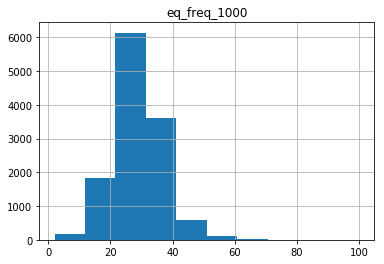

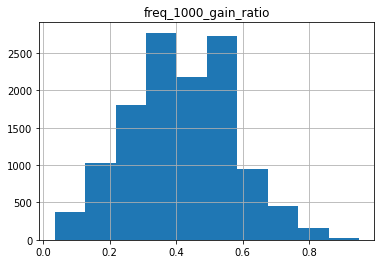

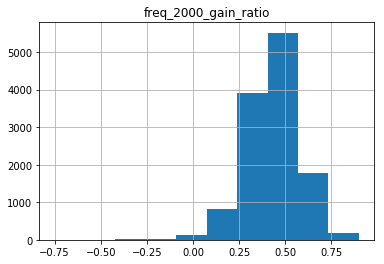

In [14]:
for feature in ['eq_freq_1000','freq_1000_gain_ratio', 'freq_2000_gain_ratio']:
    display.display(equipment_success_valid.hist(feature))

In [15]:
def scaleInner(df, feature):
    stats = df[feature].describe();
    std = stats['std']
    mean = stats['mean']
    df[feature + '_scaled'] = (df[feature] - mean)/std
    return df

def scale(df, features):
    scaledDf = df.copy()
    
    for feature in features:
        scaleInner(scaledDf, feature)
    return scaledDf        

In [16]:
def success_ratio(equipment_success, freq, multiplier, threshold ):
    data = pd.value_counts(
        equipment_success['freq_' + freq + '_gain'] > (equipment_success['freq_' + freq] * multiplier) - threshold
    )  
    return data[True]/(data[False] + data[True])

In [17]:
[success_ratio(equipment_success_valid, '500', 0.5, 5),
success_ratio(equipment_success_valid, '1000', 0.5, 5),
success_ratio(equipment_success_valid, '2000', 0.5, 5),
success_ratio(equipment_success_valid, '4000', 0.5, 5)]

[0.24570557071761118,
 0.4960667843955691,
 0.5198266174345801,
 0.24458179483063092]

In [18]:
def model_good_prediction_ratio_array(targets, predictions, max_distance):
    predictionsDiff = list(map(lambda x: abs(x), list(targets - predictions)))
    return len(list(filter(lambda x: x < max_distance, predictionsDiff)))/len(predictionsDiff)

In [21]:
def model_good_prediction_ratio(targets, predictions, max_distance):
    predictionsDiff = (targets - predictions).apply (lambda x: abs(x))
    return len(list(filter(lambda x: x < max_distance, predictionsDiff)))/len(predictionsDiff)

In [22]:
equipment_success = equipment_success_valid.copy() #[(equipment_success_valid['isMale'] == 0)
                                           # & (equipment_success_valid['decades_old'] == 7)
                                           #].copy()

equipment_success

,patient_id,center_id,ears,months_since_equipped,average_loss,high_loss,low_loss,id,age_in_months_at_equipped_start,gender,...,freq_4000_over_freq_1000,freq_500_gain,freq_1000_gain,freq_2000_gain,freq_4000_gain,freq_500_gain_ratio,freq_1000_gain_ratio,freq_2000_gain_ratio,freq_4000_gain_ratio,valid
4,496,27,L,46,61.2,70.0,51.7,1353472,929.0,NaN,...,1.8,30.0,15.0,25.0,30.0,0.5,0.3,0.4,0.4,True
5,496,27,R,21,55.0,68.0,43.3,1353164,954.0,NaN,...,1.6,-10.0,15.0,30.0,30.0,-0.2,0.3,0.5,0.4,True
10,642,27,L,67,47.5,57.5,31.7,1353584,788.0,NaN,...,1.5,10.0,15.0,30.0,20.0,0.3,0.4,0.5,0.3,True
11,642,27,R,67,48.8,58.8,35.0,1353082,788.0,NaN,...,1.4,5.0,20.0,30.0,25.0,0.2,0.4,0.5,0.4,True
14,665,27,L,61,61.2,62.5,60.0,1353632,827.0,NaN,...,1.0,10.0,35.0,20.0,35.0,0.2,0.5,0.4,0.5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86139,288398,944,R,25,42.5,40.0,50.0,1401169,639.0,NaN,...,0.6,nan,25.0,10.0,10.0,nan,0.5,0.3,0.3,True
86148,288500,56,R,84,61.2,76.4,41.2,1520183,868.0,NaN,...,1.5,5.0,25.0,40.0,40.0,0.1,0.5,0.6,0.5,True
86154,288539,1295,R,23,46.2,55.7,41.2,1497130,591.0,NaN,...,1.3,5.0,10.0,10.0,15.0,0.1,0.2,0.2,0.2,True
86161,288599,895,L,53,108.8,108.8,106.2,1517466,891.0,NaN,...,1.0,70.0,85.0,90.0,80.0,0.7,0.8,0.8,0.7,True


In [25]:
def safe_append(arr, x):
    if arr == None:
        return [x]
    arr.append(x)
    return arr
def safe_inc(n):
    if n == None:
        return 1
    return n + 1

In [26]:
center_ids = equipment_success['center_id'].values
tests_per_center = {}
for i in range(len(center_ids)):
    center_id = center_ids[i]
    tests_per_center[center_id] = safe_inc(tests_per_center.get(center_id))

## Keras

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Input, advanced_activations
from keras import optimizers
from keras import regularizers


In [ ]:
keras.__version__

In [ ]:
equipment_success_valid = scale(equipment_success_valid, ['freq_250', 'freq_500', 'freq_750', 'freq_1000', 
                                                          'freq_1500', 'freq_2000', 'freq_3000', 'freq_4000',
                                                          'freq_6000', 'freq_8000', 'years', 'decades_old', 'age_in_months_at_equipped_start'])


equipment_success_all = equipment_success_valid.copy()
#[(equipment_success_valid['isFemale'] == 1)
#                                            & (equipment_success_valid['decades_old'] == 8)
#                                           ].copy()

equipment_success = equipment_success_all.sample(frac=1)
 
equipment_success

In [ ]:
features = [
   "years_scaled",
    "isMale",
    "isFemale",
    #"isLeftEar",
    #"isRightEar",
   # 'freq_250_scaled',
    'freq_500_scaled',
    #'freq_750_scaled',
    'freq_1000_scaled',
    #'freq_1500_scaled',
    'freq_2000_scaled',
    #'freq_3000_scaled', 
    'freq_4000_scaled',
    #'freq_6000_scaled',
    'freq_8000_scaled',
    #'freq_500_over_freq_1000',
    #'freq_2000_over_freq_1000',
    #'freq_4000_over_freq_1000'
    
]

data = (equipment_success[features].values)
labels = (equipment_success['eq_freq_1000'].values)

print("original good prediction ratio: ", model_good_prediction_ratio_array(labels, np.average(labels), 5))
print("original rmse: " , np.std(labels - np.average(labels)))

# data exploration

In [19]:
original_data = data.copy()
original_labels = labels.copy()

NameError: name 'data' is not defined

In [262]:
unscaled_features = [
   "age_in_months_at_equipped_start",
    "isMale",
    "isFemale",
    'freq_250',
    'freq_500',
    'freq_750',
    'freq_1000',
    'freq_1500',
    'freq_2000',
    'freq_3000', 
    'freq_4000',
    'freq_6000',
    'freq_8000',
    
]

In [265]:
ff = equipment_success[unscaled_features].values
labels = equipment_success['eq_freq_1000'].values
[ff.shape, labels.shape]

[(12458, 13), (12458,)]

In [268]:
len(ff)

12458

In [270]:
bad = {}
for i in range(len(ff)):
    if i % 100 == 0:
        print(i)
        print(bad)
    for j in range(i + 1, len(ff)):
        if ff[i][1] == ff[j][1] and ff[i][2] == ff[j][2] and abs(ff[i][0] - ff[j][0]) < 120 and np.linalg.norm(ff[i][3:] - ff[j][3:]) < 10 and abs(labels[i] - labels[j]) >= 5:
        #if ff[i][1] == ff[j][1] and ff[i][2] == ff[j][2] and abs(ff[i][0] - ff[j][0]) < 120 and abs(ff[i][6] - ff[j][6]) <= 5 and abs(labels[i] - labels[j]) > 5:
        #if abs(ff[i][6] - ff[j][6]) <= 5 and abs(labels[i] - labels[j]) > 5:


            if bad.get(i) == None:
                bad[i] = []
            bad[i].append(j)
bad

0
{}
100
{45: [3556], 78: [714], 47: [2276, 10475]}
200
{146: [7826], 115: [7372], 135: [6966], 47: [2276, 10475], 45: [3556], 78: [714], 111: [4038]}
300
{224: [10000], 256: [11743], 293: [2803, 9624], 135: [6966], 263: [615], 45: [3556], 78: [714], 47: [2276, 10475], 146: [7826], 115: [7372], 245: [10970], 218: [9555], 111: [4038], 252: [8867]}
400
{224: [10000], 256: [11743], 327: [5326, 9636], 293: [2803, 9624], 135: [6966], 394: [4798, 8608], 263: [615], 45: [3556], 78: [714], 47: [2276, 10475], 336: [10097], 146: [7826], 115: [7372], 245: [10970], 312: [8136], 218: [9555], 111: [4038], 252: [8867], 381: [2104, 5700]}
500
{256: [11743], 327: [5326, 9636], 394: [4798, 8608], 461: [2837], 78: [714], 336: [10097], 146: [7826], 469: [5129], 409: [4201], 218: [9555], 111: [4038], 224: [10000], 263: [615], 293: [2803, 9624], 423: [7694], 444: [1201], 490: [9016], 135: [6966], 45: [3556], 47: [2276, 10475], 115: [7372], 245: [10970], 438: [7806], 312: [8136], 252: [8867], 381: [2104, 570

1500
{256: [11743], 896: [3877], 1287: [8735], 1074: [2980], 772: [7065], 1317: [9354], 1451: [6976], 263: [615], 394: [4798, 8608], 1351: [7977], 525: [3148], 654: [4509], 813: [1535], 529: [1299, 12248], 146: [7826], 958: [9023], 1177: [10083], 409: [4201], 1421: [6281], 1179: [3167], 924: [7442], 543: [4285], 545: [11133], 549: [10919], 934: [5458], 423: [7694], 552: [3546], 809: [7404], 135: [6966], 45: [3556], 47: [2276, 10475], 1329: [7468], 818: [11295], 1075: [4676], 438: [7806], 1325: [9555, 12369], 312: [8136], 569: [6500], 699: [10331], 444: [1201], 1034: [7133], 830: [4024], 703: [1837], 1402: [5212, 8529], 577: [9278, 11652], 1404: [3310, 4850, 6698], 991: [2832], 327: [5326, 9636], 714: [1876, 3914], 501: [7250, 12289], 461: [2837], 78: [714], 1149: [6628, 8772], 336: [10097], 469: [5129], 1209: [11001], 1240: [4718], 857: [7404], 218: [9555], 1115: [1981], 1141: [4771], 293: [2803, 9624], 224: [10000], 671: [5475], 1211: [3881], 1305: [5218, 6820], 870: [3516], 742: [769

2200
{256: [11743], 772: [7065], 1287: [8735], 1034: [7133], 1547: [2738, 7177], 525: [3148], 1806: [10603], 45: [3556], 529: [1299, 12248], 1305: [5218, 6820], 543: [4285], 545: [11133], 1317: [9354], 2097: [2120, 8841], 552: [3546], 809: [7404], 263: [615], 813: [1535], 47: [2276, 10475], 1329: [7468], 1074: [2980], 1075: [4676], 312: [8136], 569: [6500], 991: [2832], 830: [4024], 577: [9278, 11652], 1351: [7977], 78: [714], 336: [10097], 597: [8563], 1721: [2324], 857: [7404], 1115: [1981], 1141: [4771], 327: [5326, 9636], 1211: [3881], 1095: [5941, 11159], 293: [2803, 9624], 870: [3516], 615: [11455], 1643: [5941], 1248: [4175], 111: [4038], 115: [7372], 1140: [2980, 8058, 10632, 11386], 1325: [9555, 12369], 887: [9323], 632: [5129], 633: [7246], 1402: [5212, 8529], 1404: [3310, 4850, 6698], 1149: [6628, 8772], 894: [6430], 896: [3877], 135: [6966], 394: [4798, 8608], 1421: [6281], 654: [4509], 1935: [4549], 146: [7826], 1683: [9555], 409: [4201], 1688: [6871, 7317], 1177: [10083],

2800
{256: [11743], 2563: [4029, 7977], 772: [7065], 1287: [8735], 1034: [7133], 1547: [2738, 7177], 525: [3148], 1806: [10603], 45: [3556], 2576: [4347], 529: [1299, 12248], 2447: [9278, 11221], 1305: [5218, 6820], 2607: [3464], 2750: [6877], 543: [4285], 2336: [11166], 545: [11133], 2595: [8912, 9581, 11337], 1317: [9354], 2097: [2120, 8841], 552: [3546], 809: [7404], 263: [615], 813: [1535], 47: [2276, 10475], 1329: [7468], 1074: [2980], 1075: [4676], 2613: [9593], 312: [8136], 569: [6500], 991: [2832], 830: [4024], 577: [9278, 11652], 2389: [8873], 1351: [7977], 78: [714], 336: [10097], 2644: [4883], 597: [8563], 1721: [2324], 857: [7404], 2394: [7578], 1115: [1981], 1141: [4771], 327: [5326, 9636], 1211: [3881], 1095: [5941, 11159], 293: [2803, 9624], 870: [3516], 615: [11455], 2684: [11782], 2492: [5636], 1643: [5941], 2668: [8292], 1248: [4175], 111: [4038], 115: [7372], 1140: [2980, 8058, 10632, 11386], 1325: [9555, 12369], 887: [9323], 632: [5129], 633: [7246], 1402: [5212, 85

3200
{256: [11743], 2801: [6620], 2563: [4029, 7977], 772: [7065], 1287: [8735], 1034: [7133], 1547: [2738, 7177], 525: [3148], 1806: [10603], 45: [3556], 2576: [4347], 529: [1299, 12248], 2447: [9278, 11221], 2975: [10827], 1305: [5218, 6820], 2607: [3464], 2750: [6877], 543: [4285], 2336: [11166], 545: [11133], 2595: [8912, 9581, 11337], 1317: [9354], 2097: [2120, 8841], 552: [3546], 809: [7404], 2858: [6844], 263: [615], 813: [1535], 2862: [10787], 47: [2276, 10475], 1329: [7468], 1074: [2980], 1075: [4676], 2613: [9593], 312: [8136], 569: [6500], 991: [2832], 830: [4024], 577: [9278, 11652], 3083: [4562], 2389: [8873], 1351: [7977], 78: [714], 336: [10097], 2915: [4240], 2644: [4883], 597: [8563], 1721: [2324], 857: [7404], 2394: [7578], 1115: [1981], 1141: [4771], 2910: [8735], 2832: [4650], 327: [5326, 9636], 1211: [3881], 1095: [5941, 11159], 293: [2803, 9624], 870: [3516], 615: [11455], 2684: [11782], 2492: [5636], 1643: [5941], 2668: [8292], 1248: [4175], 111: [4038], 115: [73

3600
{3585: [11280], 2563: [4029, 7977], 1034: [7133], 1547: [2738, 7177], 525: [3148], 2576: [4347], 529: [1299, 12248], 444: [1201], 543: [4285], 545: [11133], 2595: [8912, 9581, 11337], 549: [10919], 552: [3546], 263: [615], 45: [3556], 2607: [3464], 2097: [2120, 8841], 1074: [2980], 1075: [4676], 2613: [9593], 569: [6500], 1451: [6976], 3134: [8560], 577: [9278, 11652], 3083: [4562], 1095: [5941, 11159], 78: [714], 3155: [3454], 2644: [4883], 597: [8563], 1209: [11001], 1115: [1981], 3344: [6896], 699: [10331], 615: [11455], 3516: [11617], 1643: [5941], 2668: [8292], 111: [4038], 115: [7372], 1140: [2980, 8058, 10632, 11386], 1141: [4771], 632: [5129], 633: [7246], 1658: [4622], 2684: [11782], 1149: [6628, 8772], 2693: [5983], 135: [6966], 654: [4509], 146: [7826], 1683: [9555], 2710: [6244], 2712: [10119], 1177: [10083], 3226: [3556, 4038], 1179: [3167], 671: [5475], 2728: [7317, 11529], 3246: [6048, 8187], 1148: [11310], 2738: [3981], 2739: [7832, 10365], 3256: [12342], 1721: [23

4000
{3585: [11280], 2563: [4029, 7977], 1034: [7133], 1547: [2738, 7177], 525: [3148], 2576: [4347], 529: [1299, 12248], 444: [1201], 543: [4285], 545: [11133], 2595: [8912, 9581, 11337], 549: [10919], 552: [3546], 263: [615], 45: [3556], 2607: [3464], 2097: [2120, 8841], 1074: [2980], 1075: [4676], 2613: [9593], 569: [6500], 1451: [6976], 3134: [8560], 577: [9278, 11652], 3083: [4562], 3653: [8446], 1095: [5941, 11159], 3658: [10447], 78: [714], 3155: [3454], 2644: [4883], 597: [8563], 1209: [11001], 3672: [10592], 1115: [1981], 3344: [6896], 699: [10331], 3942: [9788], 615: [11455], 3516: [11617], 1643: [5941], 2668: [8292], 111: [4038], 115: [7372], 1140: [2980, 8058, 10632, 11386], 1141: [4771], 3703: [6300], 632: [5129], 633: [7246], 1658: [4622], 2684: [11782], 1149: [6628, 8772], 2693: [5983], 135: [6966], 654: [4509], 146: [7826], 1683: [9555], 2710: [6244], 2712: [10119], 1177: [10083], 3226: [3556, 4038], 1179: [3167], 671: [5475], 3749: [10919], 2728: [7317, 11529], 3246: [

4300
{3585: [11280], 2563: [4029, 7977], 4102: [7735], 1034: [7133], 1547: [2738, 7177], 525: [3148], 2576: [4347], 529: [1299, 12248], 4121: [4191], 444: [1201], 543: [4285], 545: [11133], 2595: [8912, 9581, 11337], 549: [10919], 552: [3546], 263: [615], 45: [3556], 2607: [3464], 2097: [2120, 8841], 1074: [2980], 1075: [4676], 2613: [9593], 569: [6500], 1451: [6976], 3134: [8560], 577: [9278, 11652], 3083: [4562], 3653: [8446], 1095: [5941, 11159], 3658: [10447], 78: [714], 3155: [3454], 2644: [4883], 597: [8563], 1209: [11001], 3672: [10592], 1115: [1981], 3344: [6896], 699: [10331], 3942: [9788], 615: [11455], 4200: [11249], 3516: [11617], 1643: [5941], 2668: [8292], 111: [4038], 115: [7372], 1140: [2980, 8058, 10632, 11386], 1141: [4771], 3703: [6300], 632: [5129], 633: [7246], 1658: [4622], 2684: [11782], 1149: [6628, 8772], 2693: [5983], 135: [6966], 654: [4509], 146: [7826], 1683: [9555], 2710: [6244], 2712: [10119], 1177: [10083], 3226: [3556, 4038], 1179: [3167], 671: [5475], 

4600
{3585: [11280], 2563: [4029, 7977], 4102: [7735], 1034: [7133], 1547: [2738, 7177], 525: [3148], 2576: [4347], 529: [1299, 12248], 4121: [4191], 444: [1201], 543: [4285], 545: [11133], 2595: [8912, 9581, 11337], 549: [10919], 552: [3546], 263: [615], 45: [3556], 2607: [3464], 2097: [2120, 8841], 1074: [2980], 1075: [4676], 2613: [9593], 569: [6500], 1451: [6976], 3134: [8560], 577: [9278, 11652], 3083: [4562], 3653: [8446], 1095: [5941, 11159], 3658: [10447], 78: [714], 3155: [3454], 2644: [4883], 597: [8563], 1209: [11001], 3672: [10592], 1115: [1981], 3344: [6896], 699: [10331], 3942: [9788], 615: [11455], 4200: [11249], 3516: [11617], 1643: [5941], 2668: [8292], 111: [4038], 115: [7372], 1140: [2980, 8058, 10632, 11386], 1141: [4771], 3703: [6300], 632: [5129], 633: [7246], 1658: [4622], 2684: [11782], 1149: [6628, 8772], 2693: [5983], 135: [6966], 654: [4509], 146: [7826], 1683: [9555], 2710: [6244], 2712: [10119], 1177: [10083], 3226: [3556, 4038], 1179: [3167], 671: [5475], 

4900
{3585: [11280], 2563: [4029, 7977], 4102: [7735], 1034: [7133], 1547: [2738, 7177], 525: [3148], 2576: [4347], 529: [1299, 12248], 4121: [4191], 444: [1201], 543: [4285], 4640: [5515], 545: [11133], 2595: [8912, 9581, 11337], 549: [10919], 552: [3546], 263: [615], 45: [3556], 2607: [3464], 2097: [2120, 8841], 1074: [2980], 1075: [4676], 4660: [9782], 2613: [9593], 569: [6500], 1451: [6976], 3134: [8560], 577: [9278, 11652], 3083: [4562], 3653: [8446], 1095: [5941, 11159], 3658: [10447], 78: [714], 3155: [3454], 2644: [4883], 597: [8563], 1209: [11001], 3672: [10592], 1115: [1981], 4794: [9757], 3344: [6896], 699: [10331], 3942: [9788], 615: [11455], 4200: [11249], 3516: [11617], 1643: [5941], 2668: [8292], 111: [4038], 115: [7372], 1140: [2980, 8058, 10632, 11386], 1141: [4771], 3703: [6300], 632: [5129], 633: [7246], 1658: [4622], 2684: [11782], 1149: [6628, 8772], 2693: [5983], 4742: [8970, 10211], 135: [6966], 4716: [7224], 4727: [11746], 654: [4509], 146: [7826], 1683: [9555],

5200
{3585: [11280], 2563: [4029, 7977], 4102: [7735], 1034: [7133], 1547: [2738, 7177], 525: [3148], 2576: [4347], 529: [1299, 12248], 4121: [4191], 444: [1201], 543: [4285], 4640: [5515], 545: [11133], 2595: [8912, 9581, 11337], 549: [10919], 552: [3546], 263: [615], 5164: [5722], 45: [3556], 5166: [7769], 2607: [3464], 2097: [2120, 8841], 1074: [2980], 1075: [4676], 4660: [9782], 2613: [9593], 569: [6500], 1451: [6976], 3134: [8560], 577: [9278, 11652], 3083: [4562], 3653: [8446], 1095: [5941, 11159], 3658: [10447], 78: [714], 3155: [3454], 2644: [4883], 597: [8563], 1209: [11001], 3672: [10592], 1115: [1981], 4794: [9757], 4965: [8391], 3344: [6896], 699: [10331], 3942: [9788], 615: [11455], 4200: [11249], 3516: [11617], 1643: [5941], 2668: [8292], 111: [4038], 115: [7372], 1140: [2980, 8058, 10632, 11386], 1141: [4771], 3703: [6300], 632: [5129], 633: [7246], 1658: [4622], 2684: [11782], 1149: [6628, 8772], 2693: [5983], 4742: [8970, 10211], 135: [6966], 4716: [7224], 4727: [11746

5500
{3585: [11280], 2563: [4029, 7977], 4102: [7735], 1034: [7133], 1547: [2738, 7177], 525: [3148], 2576: [4347], 529: [1299, 12248], 4121: [4191], 444: [1201], 543: [4285], 4640: [5515], 545: [11133], 2595: [8912, 9581, 11337], 549: [10919], 552: [3546], 263: [615], 5164: [5722], 45: [3556], 5166: [7769], 2607: [3464], 2097: [2120, 8841], 1074: [2980], 1075: [4676], 4660: [9782], 2613: [9593], 569: [6500], 1451: [6976], 3134: [8560], 577: [9278, 11652], 3083: [4562], 3653: [8446], 1095: [5941, 11159], 3658: [10447], 78: [714], 3155: [3454], 2644: [4883], 597: [8563], 1209: [11001], 3672: [10592], 1115: [1981], 4794: [9757], 5214: [11306], 4965: [8391], 3344: [6896], 5218: [5416, 6820, 8058, 10234], 699: [10331], 3942: [9788], 615: [11455], 4200: [11249], 3516: [11617], 1643: [5941], 2668: [8292], 111: [4038], 5480: [7137], 115: [7372], 1140: [2980, 8058, 10632, 11386], 1141: [4771], 3703: [6300], 632: [5129], 633: [7246], 1658: [4622], 2684: [11782], 1149: [6628, 8772], 2693: [5983]

5800
{3585: [11280], 2563: [4029, 7977], 4102: [7735], 5641: [7680], 1034: [7133], 1547: [2738, 7177], 525: [3148], 2576: [4347], 529: [1299, 12248], 4121: [4191], 444: [1201], 543: [4285], 4640: [5515], 545: [11133], 2595: [8912, 9581, 11337], 549: [10919], 5542: [9056], 552: [3546], 263: [615], 5164: [5722], 45: [3556], 5166: [7769], 2607: [3464], 2097: [2120, 8841], 1074: [2980], 1075: [4676], 4660: [9782], 2613: [9593], 569: [6500], 1451: [6976], 3134: [8560], 577: [9278, 11652], 3083: [4562], 3653: [8446], 1095: [5941, 11159], 3658: [10447], 78: [714], 3155: [3454], 2644: [4883], 597: [8563], 1209: [11001], 3672: [10592], 1115: [1981], 4794: [9757], 5214: [11306], 4965: [8391], 3344: [6896], 5218: [5416, 6820, 8058, 10234], 699: [10331], 3942: [9788], 615: [11455], 4200: [11249], 3516: [11617], 1643: [5941], 2668: [8292], 111: [4038], 5480: [7137], 115: [7372], 1140: [2980, 8058, 10632, 11386], 1141: [4771], 3703: [6300], 632: [5129], 633: [7246], 1658: [4622], 2684: [11782], 1149

6100
{3585: [11280], 2563: [4029, 7977], 4102: [7735], 5641: [7680], 1034: [7133], 1547: [2738, 7177], 525: [3148], 5805: [7307], 2576: [4347], 529: [1299, 12248], 4121: [4191], 444: [1201], 543: [4285], 4640: [5515], 545: [11133], 2595: [8912, 9581, 11337], 549: [10919], 5542: [9056], 552: [3546], 263: [615], 5164: [5722], 45: [3556], 5166: [7769], 2607: [3464], 2097: [2120, 8841], 1074: [2980], 1075: [4676], 4660: [9782], 2613: [9593], 569: [6500], 1451: [6976], 3134: [8560], 577: [9278, 11652], 3083: [4562], 3653: [8446], 1095: [5941, 11159], 3658: [10447], 78: [714], 3155: [3454], 2644: [4883], 597: [8563], 1209: [11001], 3672: [10592], 1115: [1981], 4794: [9757], 5214: [11306], 4965: [8391], 3344: [6896], 5218: [5416, 6820, 8058, 10234], 699: [10331], 3942: [9788], 615: [11455], 4200: [11249], 3516: [11617], 1643: [5941], 2668: [8292], 111: [4038], 5480: [7137], 115: [7372], 1140: [2980, 8058, 10632, 11386], 1141: [4771], 3703: [6300], 632: [5129], 633: [7246], 1658: [4622], 2684:

6400
{3585: [11280], 2563: [4029, 7977], 4102: [7735], 5641: [7680], 1034: [7133], 1547: [2738, 7177], 525: [3148], 5805: [7307], 2576: [4347], 529: [1299, 12248], 4121: [4191], 444: [1201], 543: [4285], 4640: [5515], 545: [11133], 2595: [8912, 9581, 11337], 549: [10919], 5542: [9056], 552: [3546], 6185: [6860], 263: [615], 5164: [5722], 45: [3556], 5166: [7769], 2607: [3464], 2097: [2120, 8841], 1074: [2980], 1075: [4676], 4660: [9782], 2613: [9593], 569: [6500], 1451: [6976], 3134: [8560], 577: [9278, 11652], 3083: [4562], 3653: [8446], 1095: [5941, 11159], 3658: [10447], 78: [714], 3155: [3454], 2644: [4883], 597: [8563], 1209: [11001], 3672: [10592], 6234: [6845], 1115: [1981], 4794: [9757], 5214: [11306], 4965: [8391], 3344: [6896], 5218: [5416, 6820, 8058, 10234], 699: [10331], 3942: [9788], 615: [11455], 4200: [11249], 3516: [11617], 1643: [5941], 2668: [8292], 111: [4038], 5480: [7137], 115: [7372], 1140: [2980, 8058, 10632, 11386], 1141: [4771], 3703: [6300], 632: [5129], 633:

6700
{3585: [11280], 2563: [4029, 7977], 4102: [7735], 5641: [7680], 1034: [7133], 1547: [2738, 7177], 525: [3148], 5805: [7307], 2576: [4347], 529: [1299, 12248], 6676: [11249], 4121: [4191], 444: [1201], 543: [4285], 4640: [5515], 545: [11133], 2595: [8912, 9581, 11337], 549: [10919], 5542: [9056], 552: [3546], 6185: [6860], 6698: [10097], 263: [615], 5164: [5722], 45: [3556], 5166: [7769], 2607: [3464], 2097: [2120, 8841], 1074: [2980], 1075: [4676], 4660: [9782], 2613: [9593], 569: [6500], 1451: [6976], 3134: [8560], 577: [9278, 11652], 3083: [4562], 3653: [8446], 1095: [5941, 11159], 3658: [10447], 78: [714], 3155: [3454], 2644: [4883], 597: [8563], 1209: [11001], 3672: [10592], 6234: [6845], 1115: [1981], 4794: [9757], 5214: [11306], 4965: [8391], 3344: [6896], 5218: [5416, 6820, 8058, 10234], 699: [10331], 3942: [9788], 615: [11455], 4200: [11249], 3516: [11617], 1643: [5941], 2668: [8292], 111: [4038], 5480: [7137], 115: [7372], 1140: [2980, 8058, 10632, 11386], 1141: [4771], 3

7000
{3585: [11280], 2563: [4029, 7977], 4102: [7735], 5641: [7680], 1034: [7133], 1547: [2738, 7177], 525: [3148], 5805: [7307], 2576: [4347], 529: [1299, 12248], 6676: [11249], 4121: [4191], 444: [1201], 543: [4285], 4640: [5515], 545: [11133], 2595: [8912, 9581, 11337], 549: [10919], 5542: [9056], 552: [3546], 6185: [6860], 6698: [10097], 263: [615], 5164: [5722], 45: [3556], 5166: [7769], 2607: [3464], 2097: [2120, 8841], 1074: [2980], 1075: [4676], 4660: [9782], 2613: [9593], 569: [6500], 1451: [6976], 3134: [8560], 577: [9278, 11652], 3083: [4562], 3653: [8446], 1095: [5941, 11159], 3658: [10447], 78: [714], 6840: [10845], 3155: [3454], 2644: [4883], 597: [8563], 1209: [11001], 3672: [10592], 6234: [6845], 1115: [1981], 4794: [9757], 5214: [11306], 4965: [8391], 3344: [6896], 5218: [5416, 6820, 8058, 10234], 699: [10331], 3942: [9788], 615: [11455], 4200: [11249], 3516: [11617], 1643: [5941], 2668: [8292], 111: [4038], 5480: [7137], 115: [7372], 1140: [2980, 8058, 10632, 11386], 

7200
{3585: [11280], 2563: [4029, 7977], 4102: [7735], 5641: [7680], 1034: [7133], 1547: [2738, 7177], 7180: [7957], 525: [3148], 5805: [7307], 2576: [4347], 529: [1299, 12248], 6676: [11249], 4121: [4191], 444: [1201], 543: [4285], 4640: [5515], 545: [11133], 2595: [8912, 9581, 11337], 549: [10919], 5542: [9056], 552: [3546], 6185: [6860], 6698: [10097], 263: [615], 5164: [5722], 45: [3556], 5166: [7769], 2607: [3464], 2097: [2120, 8841], 1074: [2980], 1075: [4676], 4660: [9782], 2613: [9593], 569: [6500], 1451: [6976], 3134: [8560], 577: [9278, 11652], 3083: [4562], 3653: [8446], 1095: [5941, 11159], 3658: [10447], 7095: [8213], 78: [714], 6840: [10845], 3155: [3454], 2644: [4883], 597: [8563], 1209: [11001], 3672: [10592], 6234: [6845], 1115: [1981], 4794: [9757], 5214: [11306], 4965: [8391], 3344: [6896], 5218: [5416, 6820, 8058, 10234], 699: [10331], 3942: [9788], 615: [11455], 4200: [11249], 3516: [11617], 1643: [5941], 2668: [8292], 7185: [8248], 111: [4038], 5480: [7137], 115: 

7400
{3585: [11280], 2563: [4029, 7977], 4102: [7735], 5641: [7680], 1034: [7133], 1547: [2738, 7177], 7180: [7957], 525: [3148], 5805: [7307], 2576: [4347], 529: [1299, 12248], 6676: [11249], 4121: [4191], 444: [1201], 543: [4285], 4640: [5515], 545: [11133], 2595: [8912, 9581, 11337], 549: [10919], 5542: [9056], 552: [3546], 6185: [6860], 6698: [10097], 263: [615], 5164: [5722], 45: [3556], 5166: [7769], 2607: [3464], 2097: [2120, 8841], 1074: [2980], 1075: [4676], 4660: [9782], 2613: [9593], 569: [6500], 1451: [6976], 3134: [8560], 577: [9278, 11652], 3083: [4562], 7246: [7439], 3653: [8446], 1095: [5941, 11159], 3658: [10447], 7095: [8213], 78: [714], 6840: [10845], 7372: [8581], 3155: [3454], 2644: [4883], 597: [8563], 1209: [11001], 3672: [10592], 6234: [6845], 1115: [1981], 4794: [9757], 5214: [11306], 4965: [8391], 3344: [6896], 5218: [5416, 6820, 8058, 10234], 699: [10331], 3942: [9788], 615: [11455], 4200: [11249], 3516: [11617], 1643: [5941], 2668: [8292], 7185: [8248], 111:

7600
{3585: [11280], 2563: [4029, 7977], 4102: [7735], 5641: [7680], 1034: [7133], 1547: [2738, 7177], 7180: [7957], 525: [3148], 5805: [7307], 2576: [4347], 529: [1299, 12248], 6676: [11249], 7468: [8791], 4121: [4191], 444: [1201], 543: [4285], 4640: [5515], 545: [11133], 2595: [8912, 9581, 11337], 549: [10919], 5542: [9056], 552: [3546], 6185: [6860], 6698: [10097], 263: [615], 5164: [5722], 45: [3556], 5166: [7769], 2607: [3464], 2097: [2120, 8841], 1074: [2980], 1075: [4676], 4660: [9782], 2613: [9593], 569: [6500], 1451: [6976], 3134: [8560], 577: [9278, 11652], 3083: [4562], 7246: [7439], 3653: [8446], 1095: [5941, 11159], 3658: [10447], 7095: [8213], 78: [714], 6840: [10845], 7372: [8581], 3155: [3454], 2644: [4883], 597: [8563], 1209: [11001], 3672: [10592], 7541: [7741], 6234: [6845], 1115: [1981], 4794: [9757], 5214: [11306], 4965: [8391], 3344: [6896], 5218: [5416, 6820, 8058, 10234], 699: [10331], 3942: [9788], 615: [11455], 4200: [11249], 3516: [11617], 1643: [5941], 2668

7800
{3585: [11280], 2563: [4029, 7977], 4102: [7735], 5641: [7680], 1034: [7133], 1547: [2738, 7177], 7180: [7957], 525: [3148], 5805: [7307], 2576: [4347], 529: [1299, 12248], 6676: [11249], 7468: [8791], 4121: [4191], 444: [1201], 543: [4285], 4640: [5515], 545: [11133], 2595: [8912, 9581, 11337], 549: [10919], 5542: [9056], 552: [3546], 6185: [6860], 6698: [10097], 263: [615], 5164: [5722], 45: [3556], 5166: [7769], 2607: [3464], 2097: [2120, 8841], 1074: [2980], 1075: [4676], 4660: [9782], 2613: [9593], 569: [6500], 1451: [6976], 3134: [8560], 7744: [9131], 577: [9278, 11652], 3083: [4562], 7246: [7439], 3653: [8446], 1095: [5941, 11159], 3658: [10447], 7095: [8213], 78: [714], 6840: [10845], 7372: [8581], 3155: [3454], 2644: [4883], 597: [8563], 1209: [11001], 3672: [10592], 7541: [7741], 6234: [6845], 1115: [1981], 4794: [9757], 5214: [11306], 4965: [8391], 3344: [6896], 5218: [5416, 6820, 8058, 10234], 699: [10331], 3942: [9788], 615: [11455], 4200: [11249], 3516: [11617], 1643

8000
{3585: [11280], 2563: [4029, 7977], 4102: [7735], 5641: [7680], 1034: [7133], 1547: [2738, 7177], 7180: [7957], 525: [3148], 5805: [7307], 2576: [4347], 529: [1299, 12248], 6676: [11249], 7468: [8791], 4121: [4191], 444: [1201], 543: [4285], 4640: [5515], 545: [11133], 2595: [8912, 9581, 11337], 549: [10919], 5542: [9056], 552: [3546], 6185: [6860], 6698: [10097], 263: [615], 5164: [5722], 45: [3556], 5166: [7769], 2607: [3464], 2097: [2120, 8841], 1074: [2980], 1075: [4676], 4660: [9782], 2613: [9593], 569: [6500], 1451: [6976], 3134: [8560], 7744: [9131], 577: [9278, 11652], 3083: [4562], 7246: [7439], 3653: [8446], 1095: [5941, 11159], 3658: [10447], 7095: [8213], 78: [714], 6840: [10845], 7372: [8581], 3155: [3454], 2644: [4883], 597: [8563], 1209: [11001], 3672: [10592], 7541: [7741], 6234: [6845], 1115: [1981], 4794: [9757], 5214: [11306], 4965: [8391], 3344: [6896], 5218: [5416, 6820, 8058, 10234], 699: [10331], 3942: [9788], 615: [11455], 4200: [11249], 3516: [11617], 1643

8200
{3585: [11280], 2563: [4029, 7977], 4102: [7735], 5641: [7680], 1034: [7133], 1547: [2738, 7177], 7180: [7957], 525: [3148], 5805: [7307], 2576: [4347], 529: [1299, 12248], 6676: [11249], 7468: [8791], 4121: [4191], 444: [1201], 543: [4285], 4640: [5515], 545: [11133], 2595: [8912, 9581, 11337], 549: [10919], 5542: [9056], 552: [3546], 6185: [6860], 6698: [10097], 263: [615], 5164: [5722], 45: [3556], 5166: [7769], 2607: [3464], 2097: [2120, 8841], 1074: [2980], 1075: [4676], 4660: [9782], 2613: [9593], 569: [6500], 1451: [6976], 3134: [8560], 7744: [9131], 577: [9278, 11652], 3083: [4562], 7246: [7439], 3653: [8446], 1095: [5941, 11159], 3658: [10447], 7095: [8213], 78: [714], 6840: [10845], 7372: [8581], 3155: [3454], 2644: [4883], 597: [8563], 1209: [11001], 3672: [10592], 7541: [7741], 6234: [6845], 1115: [1981], 4794: [9757], 5214: [11306], 4965: [8391], 3344: [6896], 5218: [5416, 6820, 8058, 10234], 699: [10331], 3942: [9788], 615: [11455], 4200: [11249], 3516: [11617], 1643

8400
{3585: [11280], 2563: [4029, 7977], 4102: [7735], 5641: [7680], 1034: [7133], 1547: [2738, 7177], 7180: [7957], 525: [3148], 5805: [7307], 2576: [4347], 529: [1299, 12248], 6676: [11249], 7468: [8791], 4121: [4191], 444: [1201], 543: [4285], 4640: [5515], 545: [11133], 2595: [8912, 9581, 11337], 549: [10919], 5542: [9056], 552: [3546], 6185: [6860], 6698: [10097], 263: [615], 5164: [5722], 45: [3556], 5166: [7769], 2607: [3464], 2097: [2120, 8841], 1074: [2980], 1075: [4676], 4660: [9782], 2613: [9593], 569: [6500], 1451: [6976], 3134: [8560], 7744: [9131], 577: [9278, 11652], 3083: [4562], 7246: [7439], 3653: [8446], 1095: [5941, 11159], 3658: [10447], 7095: [8213], 78: [714], 6840: [10845], 7372: [8581], 3155: [3454], 2644: [4883], 597: [8563], 1209: [11001], 3672: [10592], 7541: [7741], 6234: [6845], 1115: [1981], 4794: [9757], 5214: [11306], 4965: [8391], 3344: [6896], 5218: [5416, 6820, 8058, 10234], 699: [10331], 3942: [9788], 615: [11455], 4200: [11249], 3516: [11617], 1643

8600
{3585: [11280], 2563: [4029, 7977], 4102: [7735], 5641: [7680], 1034: [7133], 1547: [2738, 7177], 7180: [7957], 525: [3148], 5805: [7307], 2576: [4347], 529: [1299, 12248], 6676: [11249], 7468: [8791], 4121: [4191], 444: [1201], 543: [4285], 4640: [5515], 545: [11133], 2595: [8912, 9581, 11337], 549: [10919], 5542: [9056], 552: [3546], 6185: [6860], 6698: [10097], 263: [615], 5164: [5722], 45: [3556], 5166: [7769], 2607: [3464], 2097: [2120, 8841], 1074: [2980], 1075: [4676], 4660: [9782], 2613: [9593], 569: [6500], 1451: [6976], 3134: [8560], 7744: [9131], 577: [9278, 11652], 3083: [4562], 7246: [7439], 3653: [8446], 1095: [5941, 11159], 3658: [10447], 7095: [8213], 78: [714], 6840: [10845], 7372: [8581], 3155: [3454], 2644: [4883], 597: [8563], 1209: [11001], 3672: [10592], 7541: [7741], 6234: [6845], 1115: [1981], 4794: [9757], 5214: [11306], 4965: [8391], 3344: [6896], 5218: [5416, 6820, 8058, 10234], 699: [10331], 3942: [9788], 615: [11455], 4200: [11249], 3516: [11617], 1643

8800
{3585: [11280], 2563: [4029, 7977], 4102: [7735], 5641: [7680], 1034: [7133], 1547: [2738, 7177], 7180: [7957], 525: [3148], 5805: [7307], 2576: [4347], 529: [1299, 12248], 6676: [11249], 7468: [8791], 4121: [4191], 444: [1201], 543: [4285], 4640: [5515], 545: [11133], 2595: [8912, 9581, 11337], 549: [10919], 5542: [9056], 552: [3546], 6185: [6860], 6698: [10097], 263: [615], 5164: [5722], 45: [3556], 5166: [7769], 2607: [3464], 8752: [10097, 11634], 2097: [2120, 8841], 1074: [2980], 1075: [4676], 4660: [9782], 2613: [9593], 569: [6500], 1451: [6976], 3134: [8560], 7744: [9131], 577: [9278, 11652], 3083: [4562], 7246: [7439], 3653: [8446], 1095: [5941, 11159], 3658: [10447], 7095: [8213], 78: [714], 6840: [10845], 7372: [8581], 3155: [3454], 2644: [4883], 597: [8563], 1209: [11001], 3672: [10592], 7541: [7741], 6234: [6845], 1115: [1981], 4794: [9757], 5214: [11306], 4965: [8391], 3344: [6896], 5218: [5416, 6820, 8058, 10234], 699: [10331], 3942: [9788], 615: [11455], 4200: [11249

9000
{3585: [11280], 2563: [4029, 7977], 4102: [7735], 5641: [7680], 1034: [7133], 1547: [2738, 7177], 7180: [7957], 525: [3148], 5805: [7307], 2576: [4347], 529: [1299, 12248], 6676: [11249], 7468: [8791], 4121: [4191], 444: [1201], 543: [4285], 4640: [5515], 545: [11133], 2595: [8912, 9581, 11337], 549: [10919], 5542: [9056], 552: [3546], 6185: [6860], 6698: [10097], 263: [615], 5164: [5722], 45: [3556], 5166: [7769], 2607: [3464], 8752: [10097, 11634], 2097: [2120, 8841], 1074: [2980], 1075: [4676], 4660: [9782], 2613: [9593], 569: [6500], 1451: [6976], 3134: [8560], 7744: [9131], 577: [9278, 11652], 3083: [4562], 7246: [7439], 3653: [8446], 1095: [5941, 11159], 3658: [10447], 7095: [8213], 78: [714], 6840: [10845], 7372: [8581], 3155: [3454], 2644: [4883], 597: [8563], 1209: [11001], 3672: [10592], 7541: [7741], 6234: [6845], 1115: [1981], 4794: [9757], 5214: [11306], 4965: [8391], 3344: [6896], 5218: [5416, 6820, 8058, 10234], 699: [10331], 3942: [9788], 615: [11455], 4200: [11249

9200
{3585: [11280], 2563: [4029, 7977], 4102: [7735], 5641: [7680], 1034: [7133], 1547: [2738, 7177], 7180: [7957], 525: [3148], 5805: [7307], 2576: [4347], 529: [1299, 12248], 6676: [11249], 7468: [8791], 4121: [4191], 444: [1201], 543: [4285], 4640: [5515], 545: [11133], 2595: [8912, 9581, 11337], 549: [10919], 5542: [9056], 552: [3546], 6185: [6860], 6698: [10097], 263: [615], 5164: [5722], 45: [3556], 5166: [7769], 2607: [3464], 8752: [10097, 11634], 2097: [2120, 8841], 1074: [2980], 1075: [4676], 4660: [9782], 2613: [9593], 9174: [12096], 569: [6500], 1451: [6976], 3134: [8560], 7744: [9131], 577: [9278, 11652], 3083: [4562], 7246: [7439], 3653: [8446], 1095: [5941, 11159], 3658: [10447], 7095: [8213], 78: [714], 6840: [10845], 7372: [8581], 3155: [3454], 2644: [4883], 597: [8563], 1209: [11001], 3672: [10592], 7541: [7741], 6234: [6845], 1115: [1981], 4794: [9757], 5214: [11306], 4965: [8391], 3344: [6896], 5218: [5416, 6820, 8058, 10234], 699: [10331], 3942: [9788], 615: [11455

9400
{3585: [11280], 2563: [4029, 7977], 4102: [7735], 5641: [7680], 1034: [7133], 1547: [2738, 7177], 7180: [7957], 525: [3148], 5805: [7307], 2576: [4347], 529: [1299, 12248], 6676: [11249], 7468: [8791], 4121: [4191], 444: [1201], 543: [4285], 4640: [5515], 545: [11133], 2595: [8912, 9581, 11337], 549: [10919], 5542: [9056], 552: [3546], 6185: [6860], 6698: [10097], 263: [615], 5164: [5722], 45: [3556], 5166: [7769], 2607: [3464], 8752: [10097, 11634], 2097: [2120, 8841], 1074: [2980], 1075: [4676], 4660: [9782], 2613: [9593], 9174: [12096], 569: [6500], 1451: [6976], 3134: [8560], 7744: [9131], 577: [9278, 11652], 3083: [4562], 7246: [7439], 3653: [8446], 1095: [5941, 11159], 3658: [10447], 7095: [8213], 78: [714], 6840: [10845], 7372: [8581], 3155: [3454], 2644: [4883], 597: [8563], 1209: [11001], 3672: [10592], 7541: [7741], 6234: [6845], 1115: [1981], 4794: [9757], 5214: [11306], 4965: [8391], 3344: [6896], 5218: [5416, 6820, 8058, 10234], 699: [10331], 3942: [9788], 615: [11455

9600
{3585: [11280], 2563: [4029, 7977], 4102: [7735], 5641: [7680], 1034: [7133], 1547: [2738, 7177], 7180: [7957], 525: [3148], 5805: [7307], 2576: [4347], 529: [1299, 12248], 6676: [11249], 7468: [8791], 4121: [4191], 444: [1201], 543: [4285], 4640: [5515], 545: [11133], 2595: [8912, 9581, 11337], 549: [10919], 5542: [9056], 552: [3546], 6185: [6860], 6698: [10097], 263: [615], 5164: [5722], 45: [3556], 5166: [7769], 2607: [3464], 8752: [10097, 11634], 2097: [2120, 8841], 1074: [2980], 1075: [4676], 4660: [9782], 2613: [9593], 9174: [12096], 569: [6500], 1451: [6976], 3134: [8560], 7744: [9131], 577: [9278, 11652], 3083: [4562], 7246: [7439], 3653: [8446], 1095: [5941, 11159], 3658: [10447], 7095: [8213], 78: [714], 6840: [10845], 7372: [8581], 3155: [3454], 2644: [4883], 597: [8563], 1209: [11001], 3672: [10592], 7541: [7741], 6234: [6845], 1115: [1981], 4794: [9757], 5214: [11306], 4965: [8391], 3344: [6896], 5218: [5416, 6820, 8058, 10234], 699: [10331], 3942: [9788], 615: [11455

9800
{3585: [11280], 2563: [4029, 7977], 4102: [7735], 5641: [7680], 1034: [7133], 1547: [2738, 7177], 7180: [7957], 525: [3148], 5805: [7307], 2576: [4347], 529: [1299, 12248], 6676: [11249], 7468: [8791], 4121: [4191], 444: [1201], 543: [4285], 4640: [5515], 545: [11133], 2595: [8912, 9581, 11337], 549: [10919], 5542: [9056], 552: [3546], 6185: [6860], 6698: [10097], 263: [615], 5164: [5722], 45: [3556], 5166: [7769], 2607: [3464], 8752: [10097, 11634], 2097: [2120, 8841], 1074: [2980], 1075: [4676], 4660: [9782], 2613: [9593], 9174: [12096], 569: [6500], 1451: [6976], 3134: [8560], 7744: [9131], 577: [9278, 11652], 3083: [4562], 7246: [7439], 3653: [8446], 1095: [5941, 11159], 3658: [10447], 7095: [8213], 78: [714], 6840: [10845], 7372: [8581], 3155: [3454], 2644: [4883], 597: [8563], 1209: [11001], 3672: [10592], 7541: [7741], 6234: [6845], 1115: [1981], 4794: [9757], 5214: [11306], 4965: [8391], 3344: [6896], 5218: [5416, 6820, 8058, 10234], 699: [10331], 3942: [9788], 615: [11455

10000
{3585: [11280], 2563: [4029, 7977], 4102: [7735], 5641: [7680], 1034: [7133], 1547: [2738, 7177], 7180: [7957], 525: [3148], 5805: [7307], 2576: [4347], 529: [1299, 12248], 6676: [11249], 7468: [8791], 4121: [4191], 444: [1201], 543: [4285], 4640: [5515], 545: [11133], 2595: [8912, 9581, 11337], 549: [10919], 5542: [9056], 552: [3546], 6185: [6860], 6698: [10097], 263: [615], 5164: [5722], 45: [3556], 5166: [7769], 2607: [3464], 8752: [10097, 11634], 2097: [2120, 8841], 1074: [2980], 1075: [4676], 4660: [9782], 2613: [9593], 9174: [12096], 569: [6500], 1451: [6976], 3134: [8560], 7744: [9131], 577: [9278, 11652], 3083: [4562], 7246: [7439], 3653: [8446], 1095: [5941, 11159], 3658: [10447], 7095: [8213], 78: [714], 6840: [10845], 7372: [8581], 3155: [3454], 2644: [4883], 597: [8563], 1209: [11001], 3672: [10592], 7541: [7741], 6234: [6845], 1115: [1981], 4794: [9757], 5214: [11306], 4965: [8391], 3344: [6896], 5218: [5416, 6820, 8058, 10234], 699: [10331], 3942: [9788], 615: [1145

10200
{3585: [11280], 2563: [4029, 7977], 4102: [7735], 5641: [7680], 1034: [7133], 1547: [2738, 7177], 7180: [7957], 525: [3148], 5805: [7307], 2576: [4347], 529: [1299, 12248], 6676: [11249], 7468: [8791], 4121: [4191], 444: [1201], 543: [4285], 4640: [5515], 545: [11133], 2595: [8912, 9581, 11337], 549: [10919], 5542: [9056], 552: [3546], 6185: [6860], 6698: [10097], 263: [615], 5164: [5722], 45: [3556], 5166: [7769], 2607: [3464], 8752: [10097, 11634], 2097: [2120, 8841], 1074: [2980], 1075: [4676], 4660: [9782], 2613: [9593], 9174: [12096], 569: [6500], 1451: [6976], 3134: [8560], 7744: [9131], 577: [9278, 11652], 3083: [4562], 7246: [7439], 3653: [8446], 1095: [5941, 11159], 3658: [10447], 7095: [8213], 78: [714], 6840: [10845], 7372: [8581], 3155: [3454], 2644: [4883], 597: [8563], 1209: [11001], 3672: [10592], 7541: [7741], 6234: [6845], 1115: [1981], 4794: [9757], 5214: [11306], 4965: [8391], 3344: [6896], 5218: [5416, 6820, 8058, 10234], 699: [10331], 3942: [9788], 615: [1145

10400
{3585: [11280], 2563: [4029, 7977], 4102: [7735], 5641: [7680], 1034: [7133], 1547: [2738, 7177], 7180: [7957], 525: [3148], 5805: [7307], 2576: [4347], 529: [1299, 12248], 6676: [11249], 7468: [8791], 4121: [4191], 444: [1201], 543: [4285], 4640: [5515], 545: [11133], 2595: [8912, 9581, 11337], 549: [10919], 5542: [9056], 552: [3546], 6185: [6860], 6698: [10097], 263: [615], 5164: [5722], 45: [3556], 5166: [7769], 2607: [3464], 8752: [10097, 11634], 2097: [2120, 8841], 1074: [2980], 1075: [4676], 4660: [9782], 2613: [9593], 10231: [12406], 9174: [12096], 569: [6500], 1451: [6976], 3134: [8560], 7744: [9131], 577: [9278, 11652], 3083: [4562], 7246: [7439], 3653: [8446], 1095: [5941, 11159], 3658: [10447], 7095: [8213], 78: [714], 6840: [10845], 7372: [8581], 3155: [3454], 2644: [4883], 597: [8563], 1209: [11001], 3672: [10592], 7541: [7741], 6234: [6845], 1115: [1981], 4794: [9757], 5214: [11306], 4965: [8391], 3344: [6896], 5218: [5416, 6820, 8058, 10234], 699: [10331], 3942: [9

10600
{3585: [11280], 2563: [4029, 7977], 4102: [7735], 5641: [7680], 1034: [7133], 1547: [2738, 7177], 7180: [7957], 525: [3148], 5805: [7307], 2576: [4347], 529: [1299, 12248], 6676: [11249], 7468: [8791], 4121: [4191], 444: [1201], 543: [4285], 4640: [5515], 545: [11133], 2595: [8912, 9581, 11337], 549: [10919], 5542: [9056], 552: [3546], 6185: [6860], 6698: [10097], 263: [615], 5164: [5722], 45: [3556], 5166: [7769], 2607: [3464], 8752: [10097, 11634], 2097: [2120, 8841], 1074: [2980], 1075: [4676], 4660: [9782], 2613: [9593], 10231: [12406], 9174: [12096], 569: [6500], 1451: [6976], 3134: [8560], 7744: [9131], 577: [9278, 11652], 3083: [4562], 7246: [7439], 3653: [8446], 1095: [5941, 11159], 3658: [10447], 7095: [8213], 78: [714], 6840: [10845], 7372: [8581], 3155: [3454], 2644: [4883], 597: [8563], 1209: [11001], 3672: [10592], 7541: [7741], 6234: [6845], 1115: [1981], 4794: [9757], 5214: [11306], 4965: [8391], 3344: [6896], 5218: [5416, 6820, 8058, 10234], 699: [10331], 3942: [9

10800
{3585: [11280], 2563: [4029, 7977], 4102: [7735], 5641: [7680], 1034: [7133], 1547: [2738, 7177], 7180: [7957], 525: [3148], 5805: [7307], 2576: [4347], 529: [1299, 12248], 6676: [11249], 7468: [8791], 4121: [4191], 444: [1201], 543: [4285], 4640: [5515], 545: [11133], 2595: [8912, 9581, 11337], 549: [10919], 5542: [9056], 552: [3546], 6185: [6860], 6698: [10097], 263: [615], 5164: [5722], 45: [3556], 5166: [7769], 2607: [3464], 8752: [10097, 11634], 2097: [2120, 8841], 1074: [2980], 1075: [4676], 4660: [9782], 2613: [9593], 10231: [12406], 9174: [12096], 569: [6500], 1451: [6976], 3134: [8560], 7744: [9131], 577: [9278, 11652], 3083: [4562], 7246: [7439], 3653: [8446], 1095: [5941, 11159], 3658: [10447], 7095: [8213], 78: [714], 6840: [10845], 7372: [8581], 3155: [3454], 2644: [4883], 597: [8563], 1209: [11001], 3672: [10592], 7541: [7741], 6234: [6845], 1115: [1981], 4794: [9757], 5214: [11306], 4965: [8391], 3344: [6896], 5218: [5416, 6820, 8058, 10234], 699: [10331], 3942: [9

11000
{4102: [7735], 1034: [7133], 3083: [4562], 7180: [7957], 7185: [8248], 857: [7404], 4121: [4191], 7203: [11429], 6185: [6860], 5164: [5722], 45: [3556], 5166: [7769], 47: [2276, 10475], 2097: [2120, 8841], 1074: [2980], 1075: [4676], 3134: [8560], 1095: [5941, 11159], 7246: [7439], 10321: [10559], 3155: [3454], 6228: [11095], 6234: [6845], 1115: [1981], 2746: [2825], 5214: [11306], 7013: [12062], 5218: [5416, 6820, 8058, 10234], 9062: [10280], 4200: [11249], 111: [4038], 115: [7372], 1140: [2980, 8058, 10632, 11386], 1141: [4771], 6265: [10478], 1148: [11310], 1149: [6628, 8772], 10371: [12293], 135: [6966], 7308: [10943], 3437: [3961, 7372], 146: [7826], 1177: [10083], 3226: [3556, 4038], 1179: [3167], 9379: [12219], 6311: [10371], 6316: [9741], 3246: [6048, 8187], 3256: [12342], 1209: [11001], 1211: [3881], 9413: [11343], 5324: [7989], 3274: [7830], 7372: [8581], 5326: [11207], 3279: [10906], 5332: [11376], 1240: [4718], 218: [9555], 1402: [5212, 8529], 6367: [9009], 1248: [417

11200
{4102: [7735], 1034: [7133], 3083: [4562], 7180: [7957], 7185: [8248], 857: [7404], 4121: [4191], 7203: [11429], 6185: [6860], 5164: [5722], 45: [3556], 5166: [7769], 47: [2276, 10475], 2097: [2120, 8841], 1074: [2980], 1075: [4676], 3134: [8560], 1095: [5941, 11159], 7246: [7439], 10321: [10559], 3155: [3454], 6228: [11095], 6234: [6845], 1115: [1981], 2746: [2825], 5214: [11306], 7013: [12062], 5218: [5416, 6820, 8058, 10234], 9062: [10280], 4200: [11249], 111: [4038], 115: [7372], 1140: [2980, 8058, 10632, 11386], 1141: [4771], 6265: [10478], 1148: [11310], 1149: [6628, 8772], 10371: [12293], 135: [6966], 7308: [10943], 3437: [3961, 7372], 146: [7826], 1177: [10083], 3226: [3556, 4038], 1179: [3167], 9379: [12219], 6311: [10371], 6316: [9741], 3246: [6048, 8187], 3256: [12342], 1209: [11001], 1211: [3881], 9413: [11343], 5324: [7989], 3274: [7830], 7372: [8581], 5326: [11207], 3279: [10906], 5332: [11376], 1240: [4718], 218: [9555], 1402: [5212, 8529], 6367: [9009], 1248: [417

11400
{4102: [7735], 1034: [7133], 3083: [4562], 7180: [7957], 7185: [8248], 857: [7404], 4121: [4191], 7203: [11429], 6185: [6860], 5164: [5722], 45: [3556], 5166: [7769], 47: [2276, 10475], 2097: [2120, 8841], 1074: [2980], 1075: [4676], 3134: [8560], 1095: [5941, 11159], 7246: [7439], 10321: [10559], 3155: [3454], 6228: [11095], 6234: [6845], 1115: [1981], 2746: [2825], 5214: [11306], 7013: [12062], 5218: [5416, 6820, 8058, 10234], 9062: [10280], 4200: [11249], 111: [4038], 115: [7372], 1140: [2980, 8058, 10632, 11386], 1141: [4771], 6265: [10478], 1148: [11310], 1149: [6628, 8772], 10371: [12293], 135: [6966], 7308: [10943], 3437: [3961, 7372], 146: [7826], 1177: [10083], 3226: [3556, 4038], 1179: [3167], 9379: [12219], 6311: [10371], 6316: [9741], 3246: [6048, 8187], 3256: [12342], 1209: [11001], 1211: [3881], 9413: [11343], 5324: [7989], 3274: [7830], 7372: [8581], 5326: [11207], 3279: [10906], 5332: [11376], 1240: [4718], 218: [9555], 1402: [5212, 8529], 6367: [9009], 1248: [417

11600
{4102: [7735], 1034: [7133], 3083: [4562], 7180: [7957], 7185: [8248], 857: [7404], 4121: [4191], 7203: [11429], 6185: [6860], 5164: [5722], 45: [3556], 5166: [7769], 47: [2276, 10475], 2097: [2120, 8841], 1074: [2980], 1075: [4676], 3134: [8560], 1095: [5941, 11159], 7246: [7439], 10321: [10559], 3155: [3454], 6228: [11095], 6234: [6845], 1115: [1981], 2746: [2825], 5214: [11306], 7013: [12062], 5218: [5416, 6820, 8058, 10234], 9062: [10280], 4200: [11249], 111: [4038], 115: [7372], 1140: [2980, 8058, 10632, 11386], 1141: [4771], 6265: [10478], 1148: [11310], 1149: [6628, 8772], 10371: [12293], 135: [6966], 7308: [10943], 3437: [3961, 7372], 146: [7826], 1177: [10083], 3226: [3556, 4038], 1179: [3167], 9379: [12219], 6311: [10371], 6316: [9741], 3246: [6048, 8187], 3256: [12342], 1209: [11001], 1211: [3881], 9413: [11343], 5324: [7989], 3274: [7830], 7372: [8581], 5326: [11207], 3279: [10906], 5332: [11376], 1240: [4718], 218: [9555], 1402: [5212, 8529], 6367: [9009], 1248: [417

11800
{4102: [7735], 1034: [7133], 3083: [4562], 7180: [7957], 7185: [8248], 857: [7404], 4121: [4191], 7203: [11429], 6185: [6860], 5164: [5722], 45: [3556], 5166: [7769], 47: [2276, 10475], 2097: [2120, 8841], 1074: [2980], 1075: [4676], 3134: [8560], 1095: [5941, 11159], 7246: [7439], 10321: [10559], 3155: [3454], 6228: [11095], 6234: [6845], 1115: [1981], 2746: [2825], 5214: [11306], 7013: [12062], 5218: [5416, 6820, 8058, 10234], 9062: [10280], 4200: [11249], 111: [4038], 115: [7372], 1140: [2980, 8058, 10632, 11386], 1141: [4771], 6265: [10478], 1148: [11310], 1149: [6628, 8772], 10371: [12293], 135: [6966], 7308: [10943], 3437: [3961, 7372], 146: [7826], 1177: [10083], 3226: [3556, 4038], 1179: [3167], 9379: [12219], 6311: [10371], 6316: [9741], 3246: [6048, 8187], 3256: [12342], 1209: [11001], 1211: [3881], 9413: [11343], 5324: [7989], 3274: [7830], 7372: [8581], 5326: [11207], 3279: [10906], 5332: [11376], 1240: [4718], 218: [9555], 1402: [5212, 8529], 6367: [9009], 1248: [417

12000
{4102: [7735], 1034: [7133], 3083: [4562], 7180: [7957], 7185: [8248], 857: [7404], 4121: [4191], 7203: [11429], 6185: [6860], 5164: [5722], 45: [3556], 5166: [7769], 47: [2276, 10475], 2097: [2120, 8841], 1074: [2980], 1075: [4676], 3134: [8560], 1095: [5941, 11159], 7246: [7439], 10321: [10559], 3155: [3454], 6228: [11095], 6234: [6845], 1115: [1981], 2746: [2825], 5214: [11306], 7013: [12062], 5218: [5416, 6820, 8058, 10234], 9062: [10280], 4200: [11249], 111: [4038], 115: [7372], 1140: [2980, 8058, 10632, 11386], 1141: [4771], 6265: [10478], 1148: [11310], 1149: [6628, 8772], 10371: [12293], 135: [6966], 7308: [10943], 3437: [3961, 7372], 146: [7826], 1177: [10083], 3226: [3556, 4038], 1179: [3167], 9379: [12219], 6311: [10371], 6316: [9741], 3246: [6048, 8187], 3256: [12342], 1209: [11001], 1211: [3881], 9413: [11343], 5324: [7989], 3274: [7830], 7372: [8581], 5326: [11207], 3279: [10906], 5332: [11376], 1240: [4718], 218: [9555], 1402: [5212, 8529], 6367: [9009], 1248: [417

12200
{4102: [7735], 1034: [7133], 3083: [4562], 7180: [7957], 7185: [8248], 857: [7404], 4121: [4191], 7203: [11429], 6185: [6860], 5164: [5722], 45: [3556], 5166: [7769], 47: [2276, 10475], 2097: [2120, 8841], 1074: [2980], 1075: [4676], 3134: [8560], 1095: [5941, 11159], 7246: [7439], 10321: [10559], 3155: [3454], 6228: [11095], 6234: [6845], 1115: [1981], 2746: [2825], 5214: [11306], 7013: [12062], 5218: [5416, 6820, 8058, 10234], 9062: [10280], 4200: [11249], 111: [4038], 115: [7372], 1140: [2980, 8058, 10632, 11386], 1141: [4771], 6265: [10478], 1148: [11310], 1149: [6628, 8772], 10371: [12293], 135: [6966], 7308: [10943], 3437: [3961, 7372], 146: [7826], 1177: [10083], 3226: [3556, 4038], 1179: [3167], 9379: [12219], 6311: [10371], 6316: [9741], 3246: [6048, 8187], 3256: [12342], 1209: [11001], 1211: [3881], 9413: [11343], 5324: [7989], 3274: [7830], 7372: [8581], 5326: [11207], 3279: [10906], 5332: [11376], 1240: [4718], 218: [9555], 1402: [5212, 8529], 6367: [9009], 1248: [417

{45: [3556],
 47: [2276, 10475],
 78: [714],
 111: [4038],
 115: [7372],
 135: [6966],
 146: [7826],
 218: [9555],
 224: [10000],
 245: [10970],
 252: [8867],
 256: [11743],
 263: [615],
 293: [2803, 9624],
 312: [8136],
 327: [5326, 9636],
 336: [10097],
 381: [2104, 5700],
 394: [4798, 8608],
 409: [4201],
 423: [7694],
 438: [7806],
 444: [1201],
 461: [2837],
 469: [5129],
 490: [9016],
 501: [7250, 12289],
 525: [3148],
 529: [1299, 12248],
 543: [4285],
 545: [11133],
 549: [10919],
 552: [3546],
 569: [6500],
 577: [9278, 11652],
 597: [8563],
 615: [11455],
 632: [5129],
 633: [7246],
 654: [4509],
 671: [5475],
 699: [10331],
 703: [1837],
 714: [1876, 3914],
 742: [7695],
 772: [7065],
 809: [7404],
 813: [1535],
 818: [11295],
 830: [4024],
 857: [7404],
 870: [3516],
 887: [9323],
 894: [6430],
 896: [3877],
 924: [7442],
 934: [5458],
 958: [9023],
 991: [2832],
 1034: [7133],
 1074: [2980],
 1075: [4676],
 1095: [5941, 11159],
 1115: [1981],
 1140: [2980, 8058, 10632, 113

In [253]:
[ff[0], labels[0]]

[array([929.,   0.,   0.,  50.,  60.,  nan,  45.,  nan,  60.,  nan,  80.,
         nan,  95.]), 30.0]

In [254]:
[ff[26], labels[26]]

[array([772.,   0.,   1.,  35.,  40.,  45.,  55.,  50.,  55.,  65.,  65.,
         60.,  60.]), 25.0]

In [271]:
list(bad.keys())

[4102,
 1034,
 3083,
 7180,
 7185,
 857,
 4121,
 7203,
 6185,
 5164,
 45,
 5166,
 47,
 2097,
 1074,
 1075,
 3134,
 1095,
 7246,
 10321,
 3155,
 6228,
 6234,
 1115,
 2746,
 5214,
 7013,
 5218,
 9062,
 4200,
 111,
 115,
 1140,
 1141,
 6265,
 1148,
 1149,
 10371,
 135,
 7308,
 3437,
 146,
 1177,
 3226,
 1179,
 9379,
 6311,
 6316,
 3246,
 3256,
 1209,
 1211,
 9413,
 5324,
 3274,
 7372,
 5326,
 3279,
 5332,
 1240,
 218,
 1402,
 6367,
 1248,
 2273,
 1404,
 3306,
 3310,
 2288,
 5362,
 5364,
 245,
 7414,
 2295,
 3320,
 4396,
 252,
 1278,
 256,
 263,
 3344,
 6418,
 11540,
 7445,
 3352,
 1305,
 6428,
 5405,
 2336,
 8482,
 293,
 2344,
 8490,
 4999,
 7468,
 1325,
 5423,
 3377,
 312,
 2361,
 10554,
 3466,
 224,
 1351,
 5451,
 336,
 2389,
 2394,
 5467,
 5468,
 8543,
 4838,
 4455,
 5480,
 4457,
 9581,
 3442,
 9014,
 7541,
 2423,
 8568,
 3450,
 2428,
 381,
 6528,
 8768,
 394,
 6539,
 1421,
 2447,
 3480,
 409,
 2460,
 5542,
 423,
 3496,
 1451,
 8626,
 3356,
 6583,
 8632,
 8633,
 3515,
 444,
 10685,
 45

In [275]:
good_data = np.delete(data, list(bad.keys()), axis=0)
good_labels = np.delete(labels, list(bad.keys()), axis=0)

In [276]:
[good_data.shape, good_labels.shape]

[(12110, 13), (12110,)]

# SVM

In [27]:
from sklearn import svm

In [60]:
my_features = [
    'center_id',
   'years',
 'genderNum',
#'freq_250',
 'freq_500',
# 'freq_750',
 'freq_1000',
# 'freq_1500',
 'freq_2000',
# 'freq_3000',
 'freq_4000',
# 'freq_6000',
 'freq_8000'
              ]
my_equipment_success = equipment_success.copy()
my_equipment_success['valid'] = (
  my_equipment_success['eq_freq_1000'].apply(lambda x : 20 <= x <= 60) 
)

#my_equipment_success = my_equipment_success.query(' valid == True').copy()
my_equipment_success = my_equipment_success.sample(frac=1)
data = my_equipment_success[my_features].values
labels = (my_equipment_success['eq_freq_1000'].values)
[data.shape, labels.shape]

[(12458, 8), (12458,)]

In [61]:
n = 10000
clf = svm.SVR(gamma='scale', kernel='rbf', C=4, epsilon=4, shrinking=True)
clf.fit(data[0:n], labels[0:n])


SVR(C=4, cache_size=200, coef0=0.0, degree=3, epsilon=4, gamma='scale',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [62]:
predictions = clf.predict(data)
print("training")

print(np.std(labels[0:n]-np.mean(labels)))
print(np.std(labels[0:n]-predictions[0:n]))
print(np.std(labels[0:n]-predictions[0:n]) ** 2)
print(model_good_prediction_ratio_array(labels[0:n], np.mean(labels), 5))
print(model_good_prediction_ratio_array(labels[0:n], predictions[0:n], 5))
print("validation")
print(np.std(labels[n+1:]-np.mean(labels)))
print(np.std(labels[n+1:]-predictions[n+1:]))
print(np.std(labels[n+1:]-predictions[n+1:]) ** 2)
print(model_good_prediction_ratio_array(labels[n+1:], np.mean(labels), 5))
print(model_good_prediction_ratio_array(labels[n+1:], predictions[n+1:], 5))

training
8.184901215653126
5.998689114862943
35.98427109677516
0.4825
0.6782
validation
8.279655545440846
6.6455240996000935
44.162990558365635
0.48717948717948717
0.6198616198616199


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVR


In [92]:
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=0)
tuned_parameters = [{'kernel': ['rbf'], 
                     'gamma': ['scale'],
                     'C': [4, 6,10],
                     'epsilon': [ 4, 6, 10],
                     'shrinking': [True]
                    }
                   ]

In [93]:
print("Generating the models")
clf = GridSearchCV(SVR(), tuned_parameters, cv=5, scoring = "neg_mean_squared_error")

clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

Generating the models
Best parameters set found on development set:

{'epsilon': 4, 'gamma': 'scale', 'shrinking': True, 'kernel': 'rbf', 'C': 4}

Grid scores on development set:

-46.883 (+/-3.438) for {'epsilon': 4, 'gamma': 'scale', 'shrinking': True, 'kernel': 'rbf', 'C': 4}
-47.240 (+/-3.715) for {'epsilon': 6, 'gamma': 'scale', 'shrinking': True, 'kernel': 'rbf', 'C': 4}
-48.924 (+/-4.105) for {'epsilon': 10, 'gamma': 'scale', 'shrinking': True, 'kernel': 'rbf', 'C': 4}
-47.089 (+/-3.356) for {'epsilon': 4, 'gamma': 'scale', 'shrinking': True, 'kernel': 'rbf', 'C': 6}
-47.248 (+/-3.616) for {'epsilon': 6, 'gamma': 'scale', 'shrinking': True, 'kernel': 'rbf', 'C': 6}
-48.837 (+/-3.958) for {'epsilon': 10, 'gamma': 'scale', 'shrinking': True, 'kernel': 'rbf', 'C': 6}
-47.805 (+/-3.018) for {'epsilon': 4, 'gamma': 'scale', 'shrinking': True, 'kernel': 'rbf', 'C': 10}
-47.801 (+/-3.538) for {'epsilon': 6, 'gamma': 'scale', 'shrinking': True, 'kernel': 'rbf', 'C': 10}
-49.257 (+/-3.70

In [42]:
clf.get_params()

{'cv': 5,
 'error_score': 'raise-deprecating',
 'estimator': SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
   gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
   tol=0.001, verbose=False),
 'estimator__C': 1.0,
 'estimator__cache_size': 200,
 'estimator__coef0': 0.0,
 'estimator__degree': 3,
 'estimator__epsilon': 0.1,
 'estimator__gamma': 'auto_deprecated',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'fit_params': None,
 'iid': 'warn',
 'n_jobs': None,
 'param_grid': [{'C': [1, 10, 100, 1000],
   'gamma': [0.001, 0.0001],
   'kernel': ['rbf']}],
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': 'warn',
 'scoring': None,
 'verbose': 0}

# Gradient boosting

In [53]:
import lightgbm as lgb

In [54]:
def model_good_prediction_ratio_diffs_array(diffs, max_distance):
    predictionsDiff = list(map(lambda x: abs(x), list(diffs)))
    return len(list(filter(lambda x: x < max_distance, predictionsDiff)))/len(predictionsDiff)

In [292]:
my_equipment_success = equipment_success.copy()

#my_equipment_success = my_equipment_success.query(' valid == True').copy()
my_equipment_success = my_equipment_success.sample(frac=1)

In [293]:
my_features = [
   'center_id',
     'freq_1000',
   'decades_old',
   # 'years',
   'genderNum',
#'freq_250',
 'freq_500',
 #'freq_750',
 #'freq_1500',
 'freq_2000',
 #'freq_3000',
 'freq_4000',
 #'freq_6000',
 #'freq_8000'
              ]

data = my_equipment_success[my_features].values
labels = (my_equipment_success['eq_freq_1000'].values)
losses = (my_equipment_success['freq_1000'].values)
labels_ratio = (my_equipment_success['eq_freq_1000'].values)/losses

[data.shape, labels.shape]

[(12458, 7), (12458,)]

In [294]:
center_ids = my_equipment_success['center_id'].values
tests_per_center = {}
for i in range(len(data)):
    center_id = center_ids[i]
    tests_per_center[center_id] = safe_inc(tests_per_center.get(center_id))
    
labels_per_center = {}
for i in range(len(data)):
    center_id = center_ids[i]
    labels_per_center[center_id] = safe_append(labels_per_center.get(center_id), labels[i])
    
mean_labels_per_center = {k: np.mean(v) for k, v in labels_per_center.items()}

labels_ratio_per_center = {}
for i in range(len(data)):
    center_id = center_ids[i]
    labels_ratio_per_center[center_id] = safe_append(labels_ratio_per_center.get(center_id),
                                                          labels[i]/data[i][1])
    
mean_labels_ratio_per_center = {k: np.mean(v) for k, v in labels_ratio_per_center.items()}

In [295]:
labels_ratio_scaled_per_center = []
for i in range(len(data)):
    center_id = center_ids[i]
    labels_ratio_scaled_per_center.append(labels_ratio[i]/mean_labels_ratio_per_center[center_id])

In [329]:
min_test_per_center = 200
good_indexes = []
for i in range(len(data)):
    center_id = center_ids[i]
    if tests_per_center[center_id] > min_test_per_center:
        good_indexes.append(i)
    
data = np.asarray([data[index] for index in good_indexes])
labels = np.asarray([labels[index] for index in good_indexes])
losses = np.asarray([losses[index] for index in good_indexes])
labels_ratio = np.asarray([labels_ratio[index] for index in good_indexes])
labels_ratio_scaled_per_center = np.asarray([labels_ratio_scaled_per_center[index] for index in good_indexes])
center_ids = np.asarray([center_ids[index] for index in good_indexes])

n = 4000
[data.shape, labels_ratio.shape]

[(5715, 7), (5715,)]

In [330]:
{k:[v,tests_per_center.get(k)] for k,v in mean_labels_ratio_per_center.items() if tests_per_center.get(k) >= min_test_per_center}

{27: [0.6615291296421173, 202],
 29: [0.5491049400196061, 549],
 32: [0.5621041186451897, 235],
 36: [0.5793794054731441, 325],
 66: [0.6471333491744541, 446],
 74: [0.47952955856314183, 301],
 86: [0.6027677507483583, 381],
 106: [0.5788376567093665, 281],
 156: [0.5937166550062908, 819],
 438: [0.5457609343887593, 502],
 466: [0.5432235574687376, 220],
 508: [0.5549011064843103, 569],
 922: [0.5788570323005848, 215],
 959: [0.5879650354526585, 200],
 1103: [0.6243686425718854, 234],
 1138: [0.6225736324942368, 221],
 1139: [0.6335174579942021, 215]}

In [361]:

train_data = lgb.Dataset(data[0:n], label=labels[0:n],
                         feature_name=my_features, categorical_feature=['genderNum', 'center_id'])
param = {'num_leaves':37,
        # 'max_depth':20,
   # 'min_gain_to_split': 1000,
        'num_trees':85, 
#          'min_data_in_leaf': 100,
#          'max_bin': 100,
         'objective':'regression'}
num_round = 30
bst = lgb.train(param, train_data, num_round)
predictions = bst.predict(data)#*losses

# for i in range(len(data)):
#     center_id = center_ids[i]
#     predictions[i] = predictions[i]*mean_labels_ratio_per_center[center_id]

delta = 5

print("training")
print(np.std(labels[0:n]-np.mean(labels)))
print(np.std(labels[0:n]-predictions[0:n]))
print(model_good_prediction_ratio_array(labels[0:n], np.mean(labels), delta))
print(model_good_prediction_ratio_array(labels[0:n], predictions[0:n], delta))

print("validation")
print(np.std(labels[n+1:]-np.mean(labels)))
print(np.std(labels[n+1:]-predictions[n+1:]))
print(model_good_prediction_ratio_array(labels[n+1:], np.mean(labels), delta))
print(model_good_prediction_ratio_array(labels[n+1:], predictions[n+1:], delta))

training
7.549966291315479
4.311113972536869
0.539
0.7895
validation
7.594777231872682
5.596403104340586
0.5239206534422404
0.676196032672112


In [275]:
center_ids = my_equipment_success['center_id'].values
diff_per_center = {}
low_baseline_diff_per_center = {}
baseline_diff_per_center = {}
for i in range(0,n):#,len(data)):
    center_id = data[i][0]
    diff = (predictions - labels)[i]
    baseline_diff = labels[i] - mean_labels_per_center[center_id]
    low_baseline_diff = labels[i] - np.mean(labels)
    diff_per_center[center_id] = safe_append(diff_per_center.get(center_id), diff)
    baseline_diff_per_center[center_id] = safe_append(baseline_diff_per_center.get(center_id), baseline_diff)
    low_baseline_diff_per_center[center_id] = safe_append(low_baseline_diff_per_center.get(center_id), low_baseline_diff)

In [276]:
my_dictionary = {k: [np.std(v),
                     model_good_prediction_ratio_diffs_array(v, delta),
                     len(v)] for k, v in diff_per_center.items()}
good_centers = {k: 1 for k,v in my_dictionary.items() if v[1] >= 0}
good_centers = {k:v  for k,v in my_dictionary.items() if good_centers.get(k) }
[sum(list(map(lambda x: x[2], list(my_dictionary.values())))),
 sum(list(map(lambda x: x[2], list(good_centers.values()))))]

[4000, 4000]

In [277]:
{k:v for k,v in mean_labels_ratio_per_center.items() if tests_per_center.get(k) >= 100}

{27: 0.6615291296421175,
 29: 0.5491049400196062,
 32: 0.5621041186451898,
 36: 0.5793794054731441,
 66: 0.6471333491744541,
 74: 0.47952955856314183,
 86: 0.6027677507483582,
 87: 0.6245610619486368,
 88: 0.625296424395777,
 96: 0.45723775168268754,
 106: 0.5788376567093666,
 116: 0.6014878672713359,
 134: 0.5373598777746839,
 145: 0.5983636742228073,
 149: 0.40578344798375304,
 155: 0.5959848726168014,
 156: 0.5937166550062908,
 165: 0.6057000526431721,
 169: 0.663904851430363,
 263: 0.5620032261286131,
 350: 0.6523138141059617,
 352: 0.6202313499265899,
 427: 0.5895843902237764,
 438: 0.5457609343887593,
 455: 0.6431517035390274,
 466: 0.5432235574687376,
 468: 0.5305261852780123,
 508: 0.5549011064843103,
 912: 0.6049200575896966,
 922: 0.5788570323005847,
 923: 0.6428144044863062,
 959: 0.5879650354526587,
 1053: 0.6088558969019073,
 1078: 0.5762032259332995,
 1103: 0.6243686425718854,
 1138: 0.6225736324942368,
 1139: 0.6335174579942021,
 1256: 0.5780173946567728}

In [278]:
print("validation on good centers")
validation_labels = labels[n+1:]
validation_predictions = predictions[n+1:]
validation_data = data[n+1:]
validataion_center_ids = center_ids[n+1:]



validation_predictions_good = []
validation_labels_good = []
for i in range(len(validation_data)):
    center_id = validataion_center_ids[i]
    if good_centers.get(center_id):
        validation_labels_good.append(validation_labels[i])
        validation_predictions_good.append(validation_predictions[i])

validation_labels_good = np.asarray(validation_labels_good)
validation_predictions_good = np.asarray(validation_predictions_good)


print(np.std(validation_labels_good - np.mean(labels)))
print(np.std(validation_labels_good - validation_predictions_good))
print(model_good_prediction_ratio_array(validation_labels_good, np.mean(labels), delta))
print(model_good_prediction_ratio_array(validation_labels_good, validation_predictions_good, delta))

validation on good centers
8.109799432736496
6.130291309791985
0.4914236706689537
0.6383647798742138


In [279]:
my_dictionary = {k: [np.std(v),
                     model_good_prediction_ratio_diffs_array(v, delta),
                     len(v)] for k, v in baseline_diff_per_center.items()}
my_dictionary

{27.0: [6.701223194983862, 0.6233766233766234, 77],
 29.0: [7.411166487751607, 0.4942084942084942, 259],
 32.0: [8.126855203904826, 0.45045045045045046, 111],
 36.0: [6.625365756824689, 0.551948051948052, 154],
 66.0: [6.766508697871945, 0.5852534562211982, 217],
 74.0: [6.361751275135966, 0.6296296296296297, 135],
 86.0: [7.5728214007027885, 0.4943181818181818, 176],
 87.0: [7.756715387613727, 0.5352112676056338, 71],
 88.0: [6.43327685085117, 0.5978260869565217, 92],
 96.0: [8.325098812218156, 0.5185185185185185, 54],
 106.0: [5.257902798467696, 0.6962962962962963, 135],
 116.0: [8.240220541217404, 0.4691358024691358, 81],
 134.0: [9.9950384516916, 0.47619047619047616, 42],
 145.0: [7.866480179639853, 0.5416666666666666, 48],
 149.0: [10.08794992539185, 0.4576271186440678, 59],
 155.0: [7.9410457900091584, 0.48936170212765956, 47],
 156.0: [6.847882126696921, 0.6325301204819277, 332],
 165.0: [7.46807945483989, 0.5340909090909091, 88],
 169.0: [6.475394805758809, 0.648936170212766, 9

In [291]:
my_dictionary = {k: [np.std(v),
                     model_good_prediction_ratio_diffs_array(v, delta),
                     len(v)] for k, v in low_baseline_diff_per_center.items()}
my_dictionary

{27.0: [6.377042156569663, 0.4, 15],
 29.0: [6.119859240437565, 0.5348837209302325, 43],
 32.0: [9.164298936634488, 0.5, 16],
 36.0: [5.158662324883007, 0.6666666666666666, 27],
 66.0: [5.60585393451057, 0.6129032258064516, 31],
 74.0: [7.200211385455552, 0.6206896551724138, 29],
 86.0: [6.670067159959288, 0.5428571428571428, 35],
 87.0: [5.436502143433363, 0.6666666666666666, 15],
 88.0: [5.266343608235224, 0.3125, 16],
 96.0: [4.979295977319692, 0.7272727272727273, 11],
 106.0: [4.06786184622831, 0.55, 20],
 116.0: [6.952686081652184, 0.5, 16],
 156.0: [6.577954919428706, 0.49056603773584906, 53],
 165.0: [10.70436048222094, 0.1111111111111111, 18],
 169.0: [5.378254348272378, 0.6363636363636364, 11],
 427.0: [6.431020501550125, 0.6666666666666666, 18],
 438.0: [8.339997335464535, 0.5111111111111111, 45],
 455.0: [5.328701692569688, 0.3333333333333333, 9],
 466.0: [6.79869268479038, 0.6, 15],
 468.0: [8.854098583616238, 0.1111111111111111, 9],
 508.0: [7.05878097754059, 0.54166666666

In [292]:
predictions = bst.predict(data)*(my_equipment_success['freq_1000'].values)

delta = 5

print("training")
print(np.std(labels[0:n]-np.mean(labels)))
print(np.std(labels[0:n]-predictions[0:n]))
print(model_good_prediction_ratio_array(labels[0:n], np.mean(labels), delta))
print(model_good_prediction_ratio_array(labels[0:n], predictions[0:n], delta))

print("validation")
print(np.std(labels[n+1:]-np.mean(labels)))
print(np.std(labels[n+1:]-predictions[n+1:]))
print(model_good_prediction_ratio_array(labels[n+1:], np.mean(labels), delta))
print(model_good_prediction_ratio_array(labels[n+1:], predictions[n+1:], delta))

ValueError: operands could not be broadcast together with shapes (7612,) (12458,) 

# Decision Tree

In [31]:
from sklearn import tree
import graphviz 

In [46]:
my_features = [
    'center_id',
   'decades_old',
 'genderNum',
#'freq_250',
 'freq_500',
# 'freq_750',
 'freq_1000',
# 'freq_1500',
 'freq_2000',
# 'freq_3000',
 'freq_4000',
# 'freq_6000',
 'freq_8000'
              ]
my_equipment_success = equipment_success.copy()


#my_equipment_success = my_equipment_success.query(' valid == True').copy()
my_equipment_success = my_equipment_success.sample(frac=1)
data = my_equipment_success[my_features].values
labels = (my_equipment_success['eq_freq_1000'].values)
[data.shape, labels.shape]

[(12458, 8), (12458,)]

## Regression

In [47]:
n = 10000
clf = tree.DecisionTreeRegressor(#min_samples_leaf=2,
   max_depth=6
                                 # min_impurity_decrease=0.025
)
clf.fit(data[0:n], labels[0:n])
[clf.score(data[0:n], labels[0:n]), clf.score(data[n+1:], labels[n+1:])]

[0.39196318556472687, 0.3679486075425974]

In [48]:
clf.feature_importances_

array([0.03908399, 0.01528429, 0.        , 0.01119611, 0.90036189,
       0.01926639, 0.00893682, 0.00587051])

In [49]:
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data) 
graph.render("idris")

'idris.pdf'

In [50]:
predictions = clf.predict(data)
print("training")

print(np.std(labels[0:n]-np.mean(labels)))
print(np.std(labels[0:n]-predictions[0:n]))
print(model_good_prediction_ratio_array(labels[0:n], np.mean(labels), 5))
print(model_good_prediction_ratio_array(labels[0:n], predictions[0:n], 5))
print("validation")
print(np.std(labels[n+1:]-np.mean(labels)))
print(np.std(labels[n+1:]-predictions[n+1:]))
print(model_good_prediction_ratio_array(labels[n+1:], np.mean(labels), 5))
print(model_good_prediction_ratio_array(labels[n+1:], predictions[n+1:], 5))

training
8.232142853473816
6.419154604058657
0.4831
0.6373
validation
8.072538085122492
6.415310251217082
0.48473748473748474
0.6247456247456248


In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
clf2 = RandomForestRegressor(n_estimators=40, max_features=7, max_depth=6) #, min_impurity_decrease=0.025)#,min_samples_leaf=10)
clf2.fit(data[0:n], labels[0:n])
[clf2.score(data[0:n], labels[0:n]), clf2.score(data[n+1:], labels[n+1:])]


[0.3969013571288529, 0.3739782208927186]

In [43]:
clf2.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 6,
 'max_features': 7,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 40,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [45]:
predictions = clf2.predict(data)
print("training")

print(np.std(labels[0:n]-np.mean(labels)))
print(np.std(labels[0:n]-predictions[0:n]))
print(model_good_prediction_ratio_array(labels[0:n], np.mean(labels), 5))
print(model_good_prediction_ratio_array(labels[0:n], predictions[0:n], 5))
print("validation")
print(np.std(labels[n+1:]-np.mean(labels)))
print(np.std(labels[n+1:]-predictions[n+1:]))
print(model_good_prediction_ratio_array(labels[n+1:], np.mean(labels), 5))
print(model_good_prediction_ratio_array(labels[n+1:], predictions[n+1:], 5))

training
8.240442121634008
6.399473509363351
0.4795
0.6336
validation
8.054815793079321
6.372408010667829
0.49898249898249897
0.6149776149776149


## Classifier

[6 5 4 ... 6 6 7]


99.88743492331504

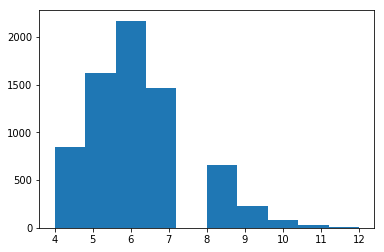

In [42]:
def rounder(t): 
    return int(round(t / 5))


classes = np.array([rounder(xi) for xi in labels])
print(classes)
plt.hist(classes)
100*len(list(filter(lambda x : 10 < x < 60, labels)))/len(data)

In [43]:
data[0] = np.array([rounder(xi) for xi in data[0]])
data[0]

array([15.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.])

In [45]:
set(classes)

{4, 5, 6, 7, 8, 9, 10, 11, 12}

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
clf2 = RandomForestClassifier(n_estimators=10, max_features=3)#,min_samples_leaf=10)
clf2.fit(data[0:4000], classes[0:4000])
[clf2.score(data[0:4000], classes[0:4000]), clf2.score(data[4000:], classes[4000:])]

[0.986, 0.43595634692705343]

In [23]:
proba = np.asarray(list(map(lambda x: np.max(x), clf2.predict_proba(data))))
good_indices = np.ndarray.nonzero(proba > 0.8)[0]
good_indices.shape
training_good_indices = list(filter(lambda x : x < 4000, good_indices))
validation_good_indices = list(filter(lambda x : 5000 > x >= 4000, good_indices))

[len(training_good_indices), len(validation_good_indices)]

[1512, 65]

In [24]:
[clf2.score(data[training_good_indices], classes[training_good_indices]), 
 clf2.score(data[validation_good_indices], classes[validation_good_indices])]


[1.0, 0.6]

In [25]:
def classifier_good_prediction_ratio_array(targets, predictions):
    predictionsDiff = (targets == predictions)
    return len(list(filter(lambda x: x , predictionsDiff)))/len(predictionsDiff)

In [64]:
clf = tree.DecisionTreeClassifier(#min_samples_leaf=None,
                                  min_impurity_decrease=0.0004)
clf.fit(data[0:4000], classes[0:4000])
[clf.score(data[0:4000], classes[0:4000]), clf.score(data[4000:], classes[4000:])]

[0.6895, 0.2774380431284197]

In [48]:
proba = np.asarray(list(map(lambda x: np.max(x), clf.predict_proba(data))))
good_indices = np.ndarray.nonzero(proba > 0.8)[0]
good_indices.shape
training_good_indices = list(filter(lambda x : x < 4000, good_indices))
validation_good_indices = list(filter(lambda x : 5000 > x >= 4000, good_indices))

[len(training_good_indices), len(validation_good_indices)]

[921, 238]

In [65]:
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data) 
graph.render("idris")

'idris.pdf'

In [66]:
my_features

['age_in_months_at_equipped_start',
 'genderNum',
 'freq_250',
 'freq_500',
 'freq_750',
 'freq_1000',
 'freq_1500',
 'freq_2000',
 'freq_3000',
 'freq_4000',
 'freq_6000',
 'freq_8000']

In [68]:
clf.feature_importances_

array([0.16884115, 0.0379173 , 0.08200905, 0.05728869, 0.05819589,
       0.18872879, 0.07068765, 0.07153705, 0.06494943, 0.06334823,
       0.07325976, 0.06323702])

In [70]:
proba = np.asarray(list(map(lambda x: np.max(x), clf.predict_proba(data))))
good_indices = np.ndarray.nonzero(proba > 0.8)[0]
good_indices.shape
training_good_indices = list(filter(lambda x : x < 4000, good_indices))
validation_good_indices = list(filter(lambda x : 5000 > x >= 4000, good_indices))

[len(training_good_indices), len(validation_good_indices)]

[1369, 342]

In [71]:
[clf.score(data[training_good_indices], classes[training_good_indices]), 
 clf.score(data[validation_good_indices], classes[validation_good_indices])]


[0.9642074506939372, 0.24269005847953215]

In [56]:
relevant_labels = classes[0:4000]
[classifier_good_prediction_ratio_array(relevant_labels, int(np.average(relevant_labels))), 
  clf.score(data[0:4000], classes[0:4000])]

[0.308, 0.65225]

In [920]:
relevant_labels = classes[4000:]
[classifier_good_prediction_ratio_array(relevant_labels, int(np.average(relevant_labels))), 
  clf.score(data[4000:], classes[4000:])]

[0.27484204480183805, 0.46898334290637567]

In [878]:
i = validation_good_indices[1]
print(i)
print(clf.predict_proba(data[[i]]))
classes[i]

4042
[[0.         0.         0.91891892 0.08108108 0.         0.        ]]


3

In [882]:
[labels[4042],
data[4042]]

[40.0, array([780.,   0.,  50.,  55.,  60.,  60.,  70.,  65.,  70.,  80.,  75.,
         85.])]

In [911]:
list(map(lambda x: [x, rounder(x)], range(1, 100)))

[[1, 0],
 [2, 0],
 [3, 0],
 [4, 0],
 [5, 0],
 [6, 0],
 [7, 0],
 [8, 0],
 [9, 0],
 [10, 1],
 [11, 1],
 [12, 1],
 [13, 1],
 [14, 1],
 [15, 2],
 [16, 2],
 [17, 2],
 [18, 2],
 [19, 2],
 [20, 2],
 [21, 2],
 [22, 2],
 [23, 2],
 [24, 2],
 [25, 2],
 [26, 3],
 [27, 3],
 [28, 3],
 [29, 3],
 [30, 3],
 [31, 3],
 [32, 3],
 [33, 3],
 [34, 3],
 [35, 4],
 [36, 4],
 [37, 4],
 [38, 4],
 [39, 4],
 [40, 4],
 [41, 4],
 [42, 4],
 [43, 4],
 [44, 4],
 [45, 4],
 [46, 5],
 [47, 5],
 [48, 5],
 [49, 5],
 [50, 5],
 [51, 5],
 [52, 5],
 [53, 5],
 [54, 5],
 [55, 6],
 [56, 6],
 [57, 6],
 [58, 6],
 [59, 6],
 [60, 6],
 [61, 12],
 [62, 12],
 [63, 12],
 [64, 12],
 [65, 12],
 [66, 12],
 [67, 12],
 [68, 12],
 [69, 12],
 [70, 12],
 [71, 12],
 [72, 12],
 [73, 12],
 [74, 12],
 [75, 12],
 [76, 12],
 [77, 12],
 [78, 12],
 [79, 12],
 [80, 12],
 [81, 12],
 [82, 12],
 [83, 12],
 [84, 12],
 [85, 12],
 [86, 12],
 [87, 12],
 [88, 12],
 [89, 12],
 [90, 12],
 [91, 12],
 [92, 12],
 [93, 12],
 [94, 12],
 [95, 12],
 [96, 12],
 [97, 12],
 [

# Neural Network

In [87]:
def good_prediction_error(y_true, y_pred):
    g = tf.subtract(y_true, y_pred)
    g = tf.cast(g < 5.0, tf.float32)
    return g
    
    
#good_prediction_error(np.array([1, 20]), np.array([0, 0]))

In [88]:
features

['years_scaled',
 'isMale',
 'isFemale',
 'freq_500_scaled',
 'freq_1000_scaled',
 'freq_2000_scaled',
 'freq_4000_scaled',
 'freq_8000_scaled']

In [90]:
eq = equipment_success.sample(frac=1)
data = (equipment_success[features].values)
labels = (equipment_success['eq_freq_1000'].values)

In [91]:
data = original_data.copy()
np.random.shuffle(data)
data.shape


(12458, 8)

In [97]:

model = Sequential([
    Dense(300, input_dim=len(features)),
    advanced_activations.LeakyReLU(alpha=0.3),
    Dense(100),
    advanced_activations.LeakyReLU(alpha=0.3),
    Dense(100),
    advanced_activations.LeakyReLU(alpha=0.3),
    Dense(1),
])


model.compile(optimizer=optimizers.Adam(lr=0.01),
              loss='mean_squared_error',       
              metrics=[ 'mean_squared_error'])  

validation_split=0.2
training_samples = int(len(data)*(1-validation_split))
history = model.fit(data, labels, epochs=200, steps_per_epoch=100,
                   validation_split=validation_split, 
                    validation_steps=100,
                    verbose=1)

Train on 9966 samples, validate on 2492 samples
Epoch 1/200
100/100 [==============================] - 10s 99ms/step - loss: 119.6624 - mean_squared_error: 119.6624 - val_loss: 64.9613 - val_mean_squared_error: 64.9613
Epoch 2/200
100/100 [==============================] - 9s 88ms/step - loss: 67.1530 - mean_squared_error: 67.1530 - val_loss: 65.1030 - val_mean_squared_error: 65.1030
Epoch 3/200
100/100 [==============================] - 9s 85ms/step - loss: 66.5064 - mean_squared_error: 66.5064 - val_loss: 65.4505 - val_mean_squared_error: 65.4505
Epoch 4/200
100/100 [==============================] - 9s 86ms/step - loss: 66.0074 - mean_squared_error: 66.0074 - val_loss: 65.9980 - val_mean_squared_error: 65.9980
Epoch 5/200
100/100 [==============================] - 9s 88ms/step - loss: 65.9446 - mean_squared_error: 65.9446 - val_loss: 66.2983 - val_mean_squared_error: 66.2983
Epoch 6/200
100/100 [==============================] - 9s 87ms/step - loss: 65.2721 - mean_squared_error: 65.

KeyboardInterrupt: 

In [75]:
from operator import itemgetter
# ע
a, b = min(enumerate(history.history['mean_squared_error']), key=itemgetter(1)) 
[a, math.sqrt(b)]

[197, 6.261045729461158]

In [76]:

relevant_data = data[0:training_samples]
relevant_labels = labels[0:training_samples]
predictions = model.predict(relevant_data).transpose()[0]
[model_good_prediction_ratio_array(relevant_labels, predictions, 5),
 model_good_prediction_ratio_array(relevant_labels, np.average(relevant_labels), 5),
 np.std(relevant_labels - predictions),
 np.std(relevant_labels - np.average(relevant_labels))
]



[0.6122817579771223, 0.4813365442504515, 6.132738280095858, 8.24388650902084]

In [77]:
relevant_data = data[training_samples:]
relevant_labels = labels[training_samples:]
predictions = model.predict(relevant_data).transpose()[0]
[model_good_prediction_ratio_array(relevant_labels, predictions, 5),
 model_good_prediction_ratio_array(relevant_labels, np.average(relevant_labels), 5),
 np.std(relevant_labels - predictions),
 np.std(relevant_labels - np.average(relevant_labels))
]


[0.4085072231139647, 0.49157303370786515, 9.732953396268867, 8.042764194759142]

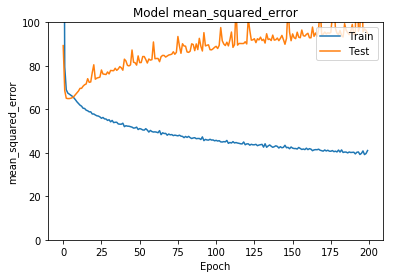

In [78]:

# Plot training & validation loss values
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model mean_squared_error')
plt.ylabel('mean_squared_error')
plt.ylim(0, 100)
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [138]:
test_dataset = equipment_success_all.copy() #[(equipment_success_valid['isMale'] == 0)
                                           # & (equipment_success_valid['decades_old'] == 7)
                                           #].copy()
        
test_dataset = test_dataset.sample(frac=1)
test_dataset = test_dataset.tail(1000)
test_data = (test_dataset[features].values)
test_labels = (test_dataset['eq_freq_2000'].values)

test_predictions = model.predict(test_data).transpose()[0]
[model_good_prediction_ratio_array(test_labels, test_predictions, 5),
 model_good_prediction_ratio_array(test_labels, np.average(test_labels), 5)]


[0.578, 0.515]

In [24]:
test_labels - test_predictions

array([ 2.05080795e+00, -7.94754410e+00, -1.29538536e+01, -2.95101547e+00,
        3.27393723e+00,  8.27403069e+00, -2.28575363e+01, -1.57872200e+00,
        4.10610580e+00, -6.93192291e+00,  2.07655716e+00, -2.19954643e+01,
       -2.95190430e+00,  3.52158165e+00, -1.57377625e+00,  3.27444458e+00,
       -2.95045471e+00,  2.04628754e+00, -1.82958221e+00, -1.72612762e+00,
       -7.61500168e+00, -1.73098564e+00,  2.04937744e+00,  3.27481079e+00,
        1.47110004e+01,  1.25687962e+01, -1.72239685e+00,  1.32738705e+01,
       -3.20412064e+00,  8.34257889e+00, -2.95625305e+00,  2.74271011e-01,
       -1.73409271e+00, -1.72612953e+00, -1.29504852e+01,  7.04953384e+00,
        3.12254906e+00, -1.67822075e+00, -7.96102142e+00,  4.94232178e-02,
       -1.19523697e+01,  2.30931072e+01,  1.32749939e+01, -2.95349121e+00,
       -3.82720566e+00,  3.26380539e+00,  2.00729370e+00, -7.95290375e+00,
        3.72333717e+00,  2.04780197e+00, -2.95038605e+00, -1.70900726e+00,
        3.27503395e+00,  